In [1]:
# This is to access the package without it being installed for testing.
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
from pylossmap import BLMDataFetcher
from pylossmap.utils import to_datetime
from pylossmap.utils import row_from_time
from pylossmap.plotting import plot_loss_map

/home/lcoyle/anaconda2/envs/loss_maps/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
import pytimber
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
db = pytimber.LoggingDB()
fetcher = BLMDataFetcher()

In [5]:
t1 = pd.to_datetime('2018-06-15 00:00:00').tz_localize('Europe/Zurich')
t2 = pd.to_datetime('2018-06-15 12:00:00').tz_localize('Europe/Zurich')

In [6]:
def OP_LM_plot(fills, beam_mode):
    for f in fills:
        for m in f['beamModes']:
            if m['mode'] == beam_mode:
                start_time = m['startTime']
                end_time = m['endTime']

        BLM_data = fetcher.from_datetimes(start_time, end_time)
        BLM_data.plot(title=f'{beam_mode}')
        BLM_bg = fetcher.bg_from_INJPROT(f['fillNumber'])
        for idx, blms in BLM_data.iter_max():
            LM = BLM_data.loss_map(row=BLM_data.data.loc[idx],
                                   datetime=idx[1],
                                   background=BLM_bg.data.mean())
            LM_b1 = LM.clean_background().beam(1).normalize()
            LM_b2 = LM.clean_background().beam(2).normalize()
            
            if any(['B1' in b for b in blms]):
                LM_b1.plot(title=f'B1 {idx[1]}\n{blms}')
                LM_b1.IR(7).plot(title=f'B1 {idx[1]}\n{blms}')
            if any(['B2' in b for b in blms]):
                LM_b2.plot(title=f'B2 {idx[1]}\n{blms}')
                LM_b2.IR(7).plot(title=f'B2 {idx[1]}\n{blms}')
        plt.show()

# INJPHYS

Beam mode INJPHYS
06-15 02:09:48 ▶06-15 02:31:37
Beam mode INJPROT
06-15 01:50:07 ▶06-15 01:54:49


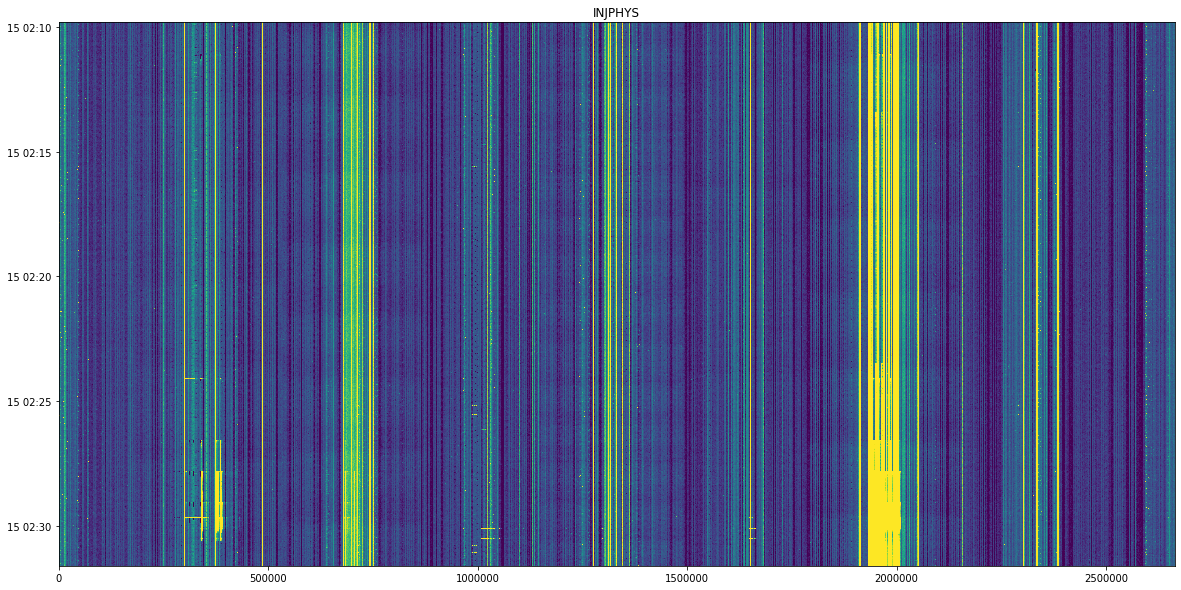

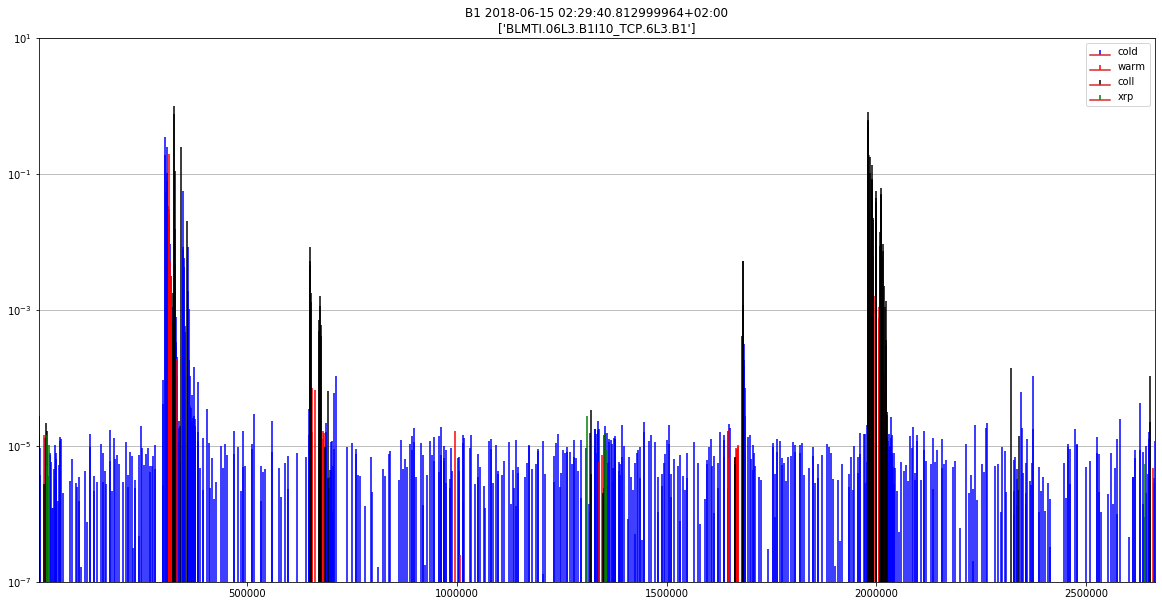

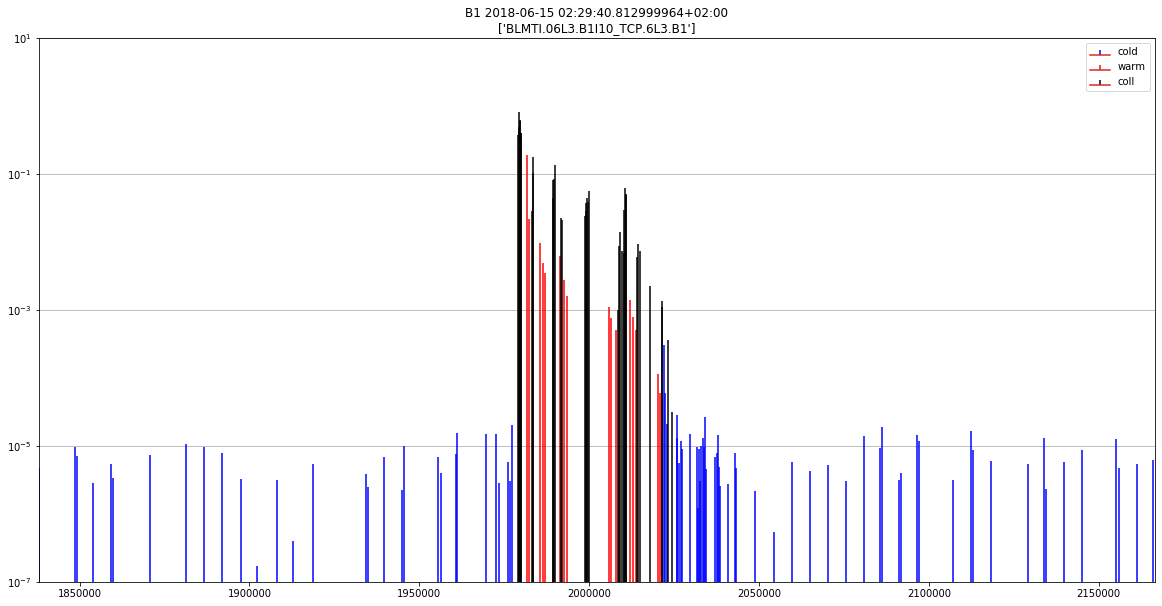

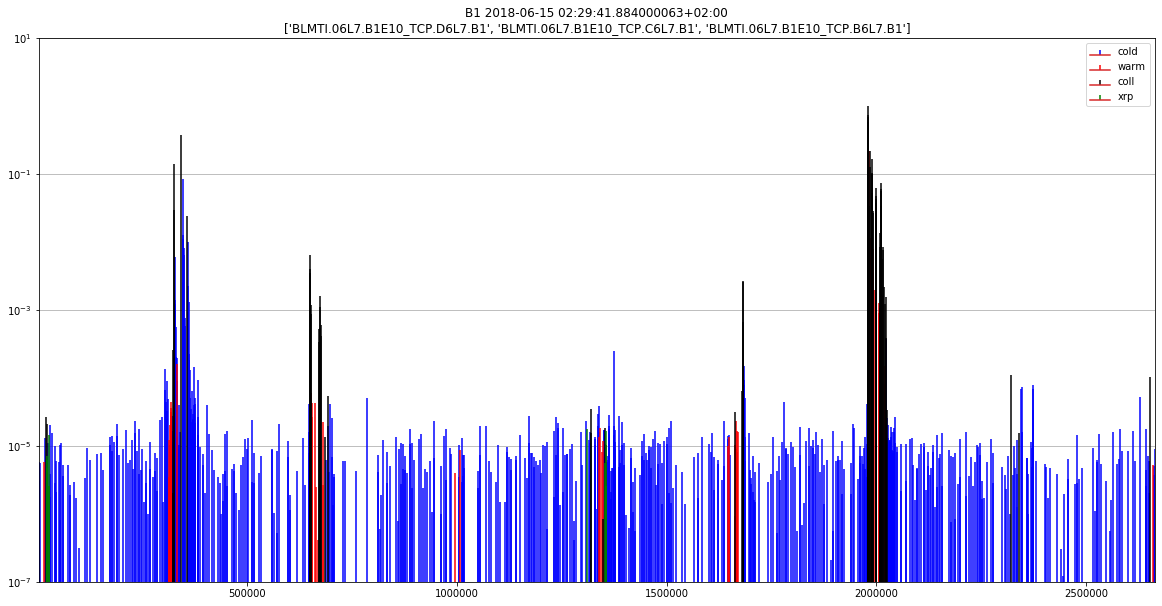

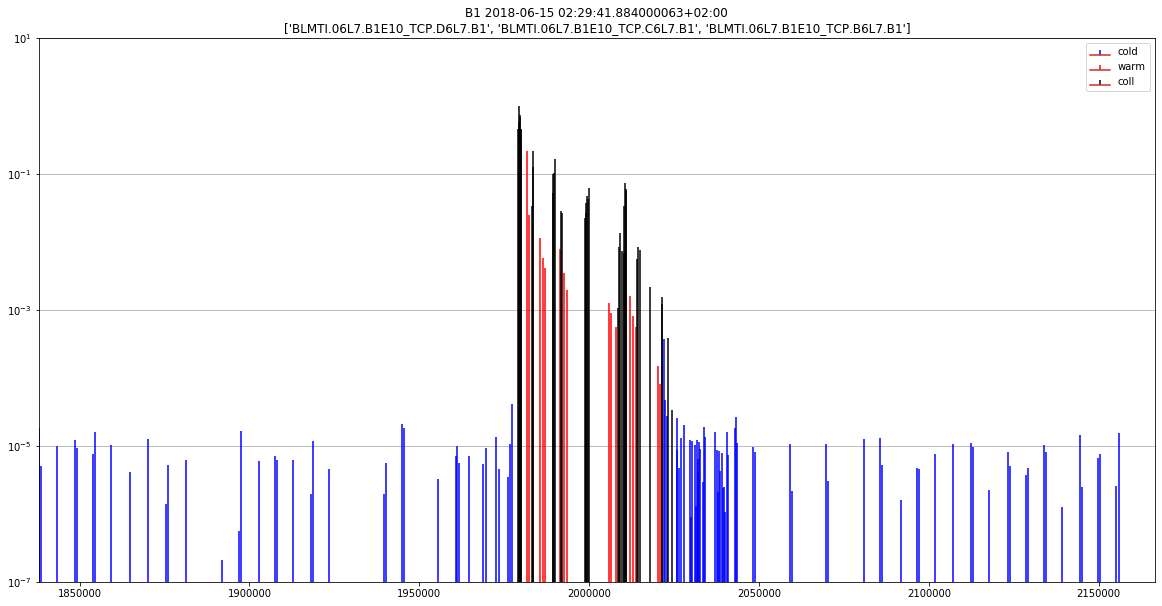

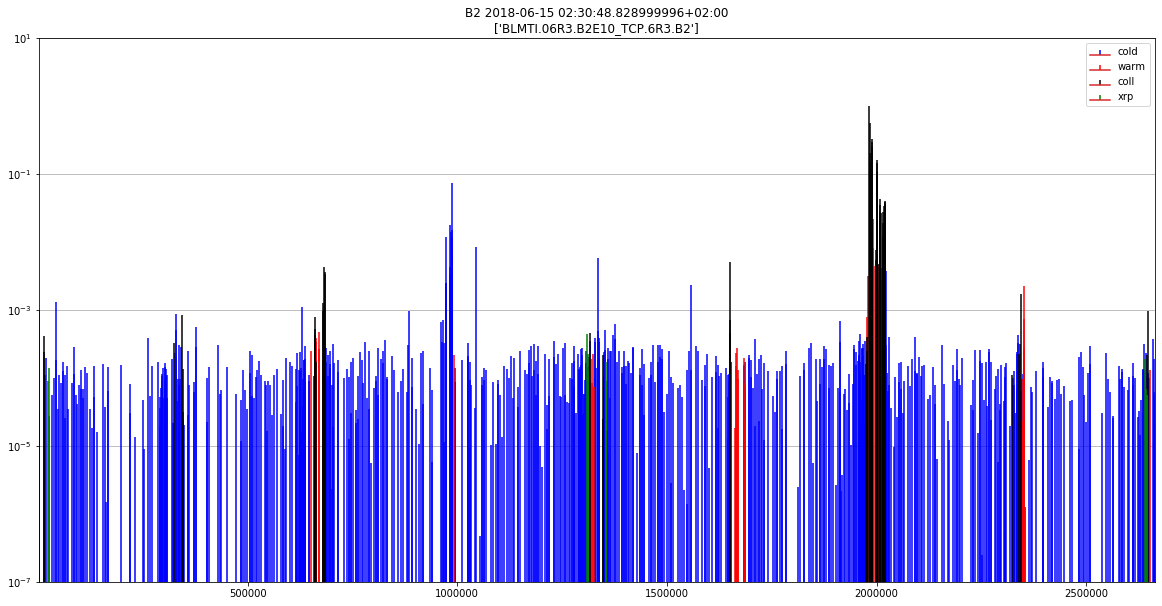

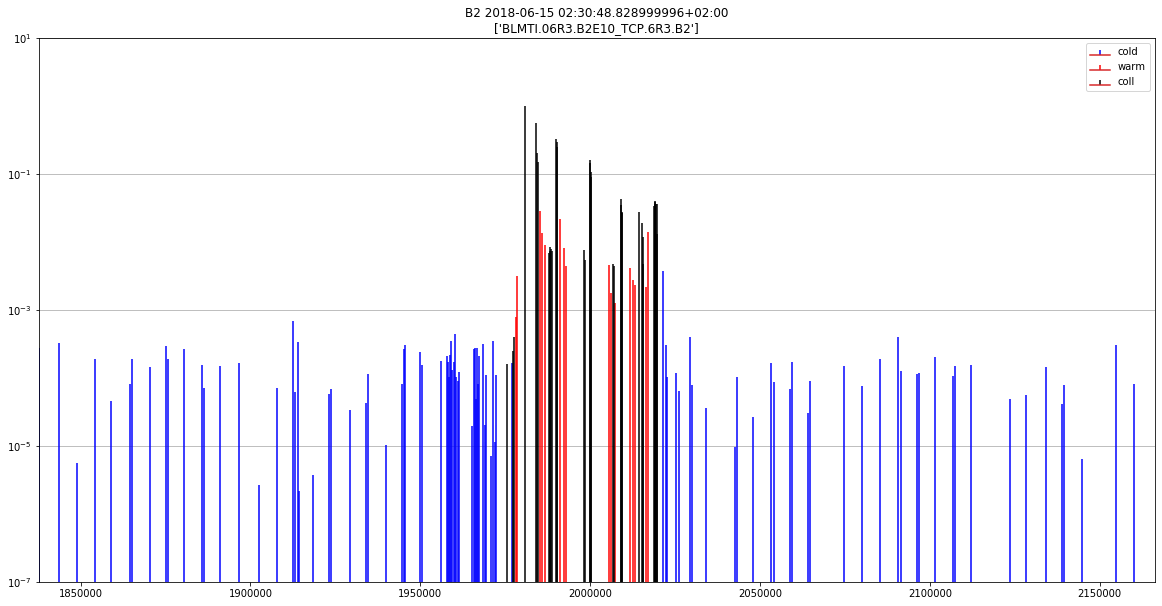

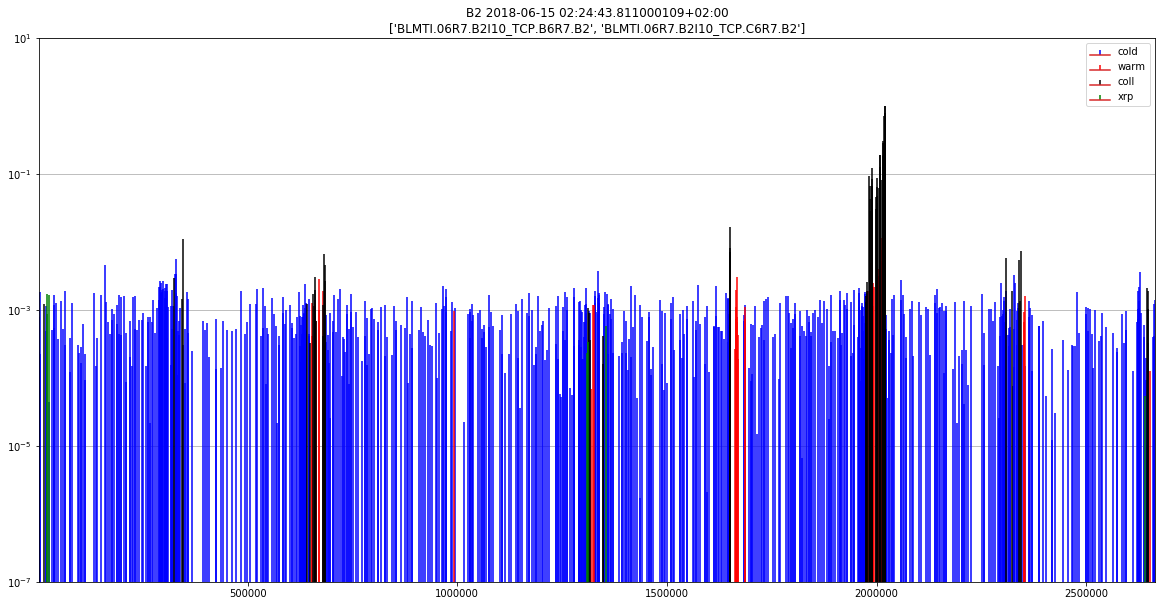

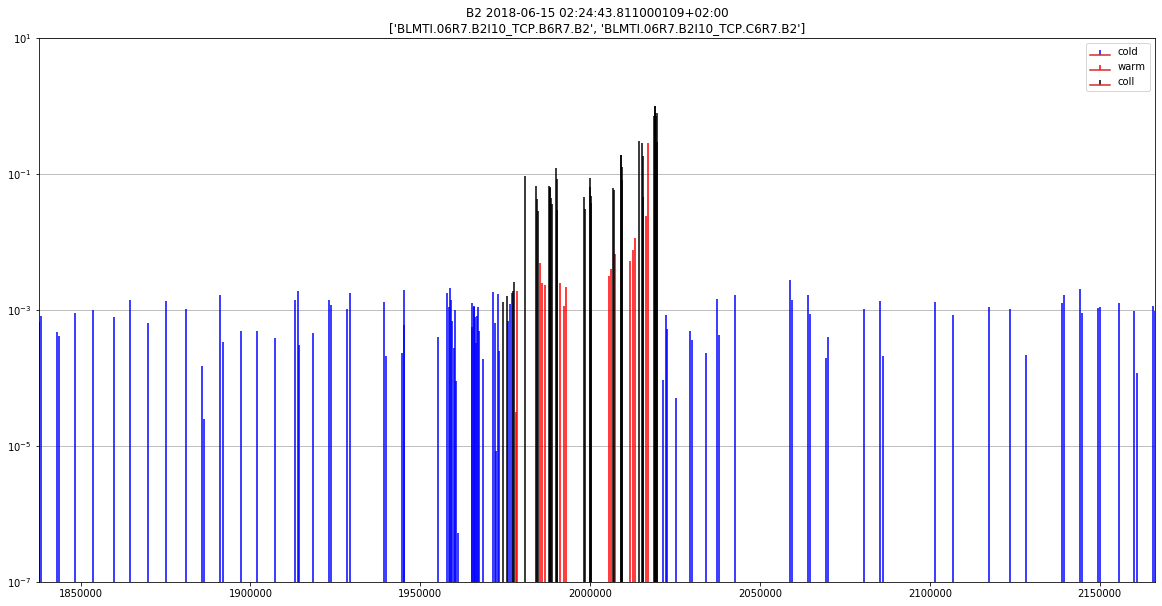

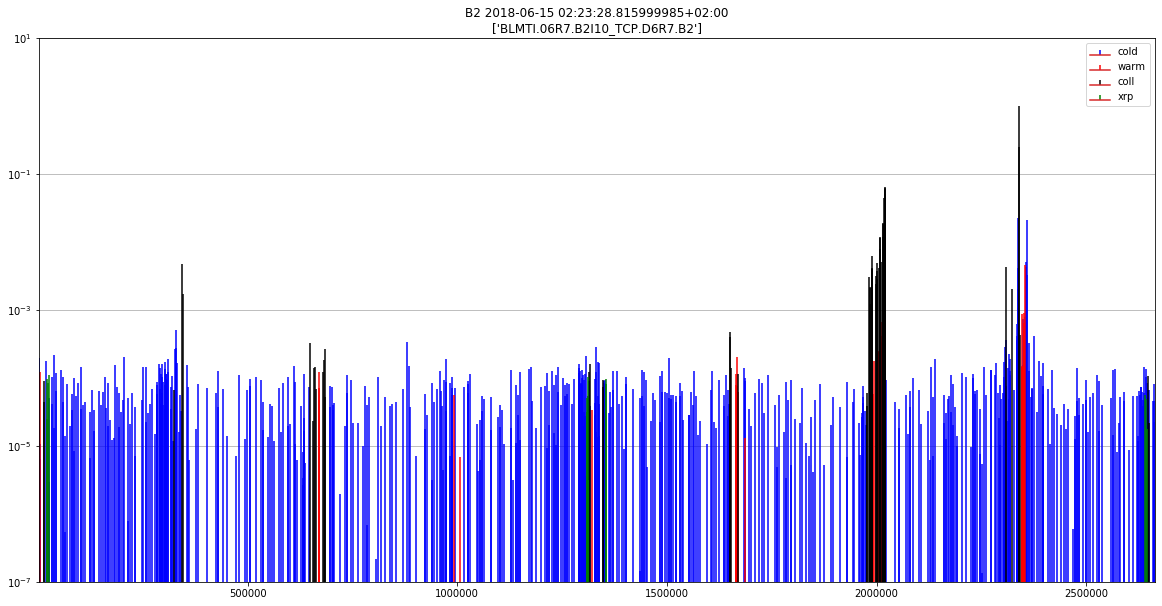

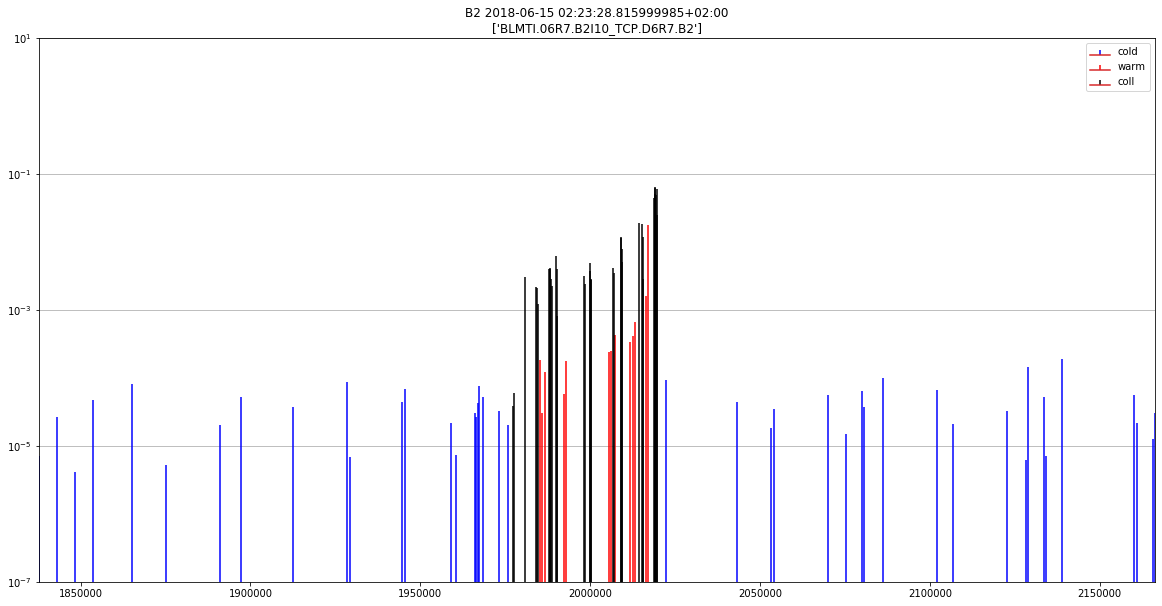

Beam mode INJPHYS
06-15 07:16:11 ▶06-15 07:34:30
Beam mode INJPROT
06-15 06:54:06 ▶06-15 07:05:02


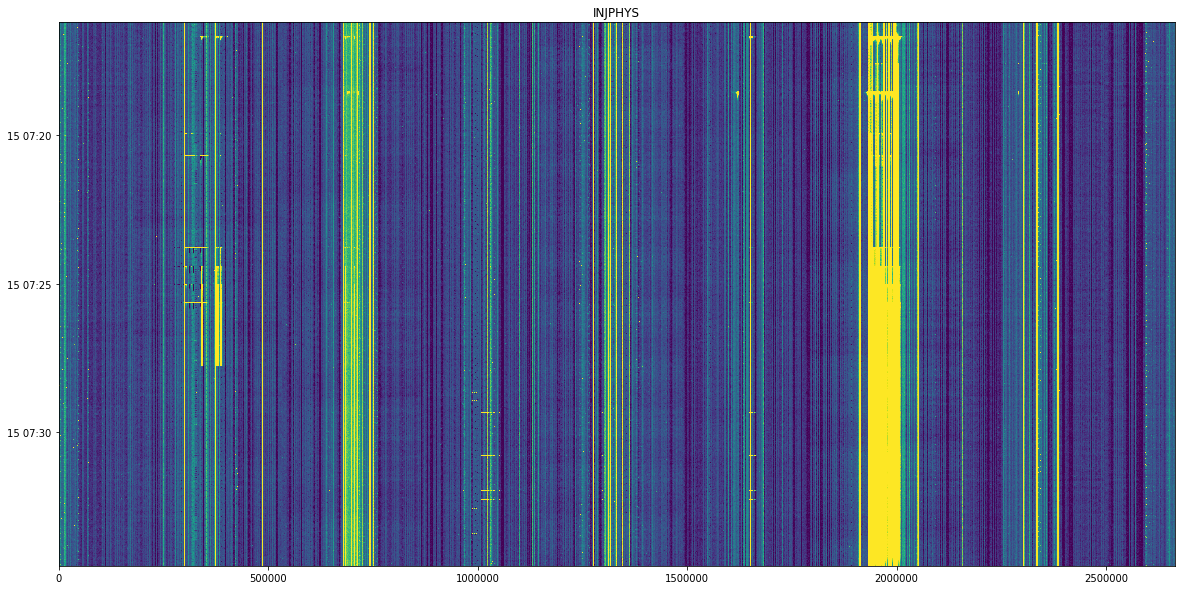

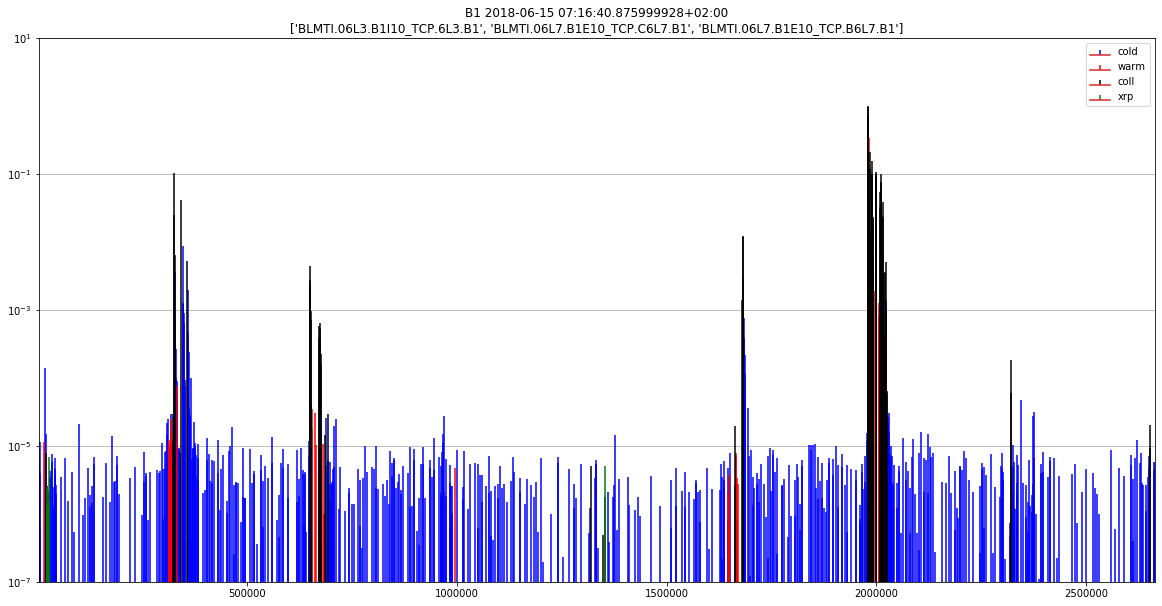

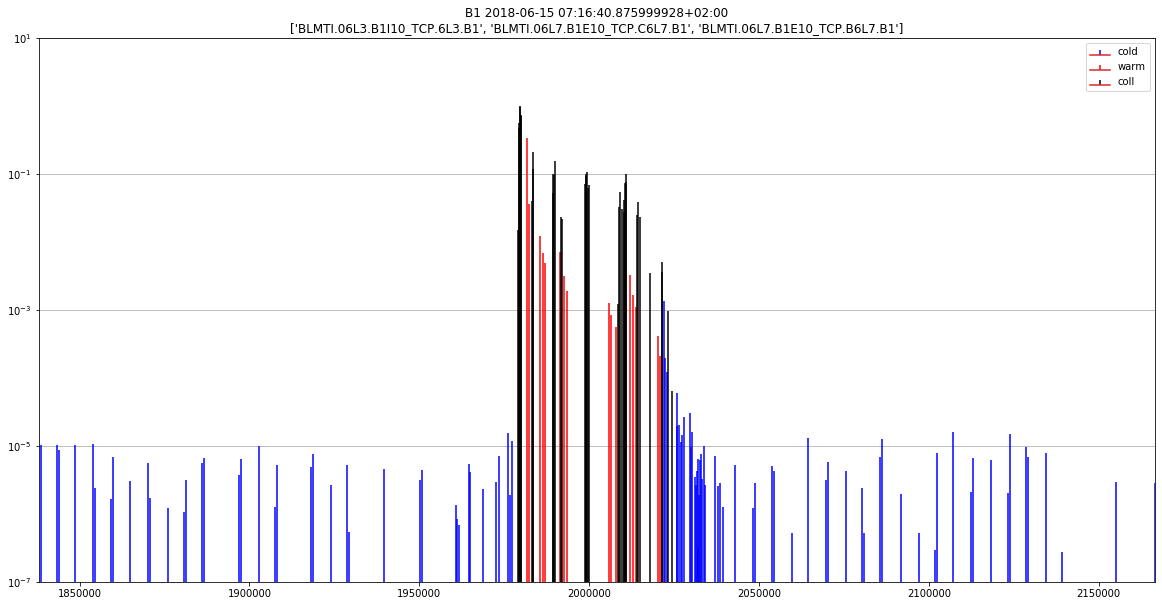

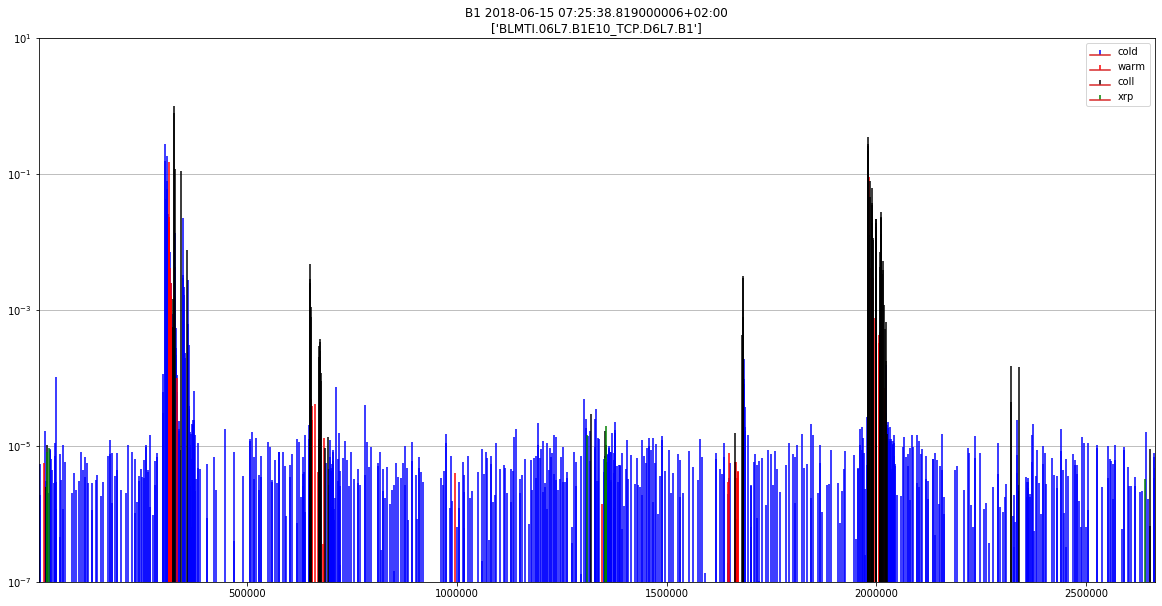

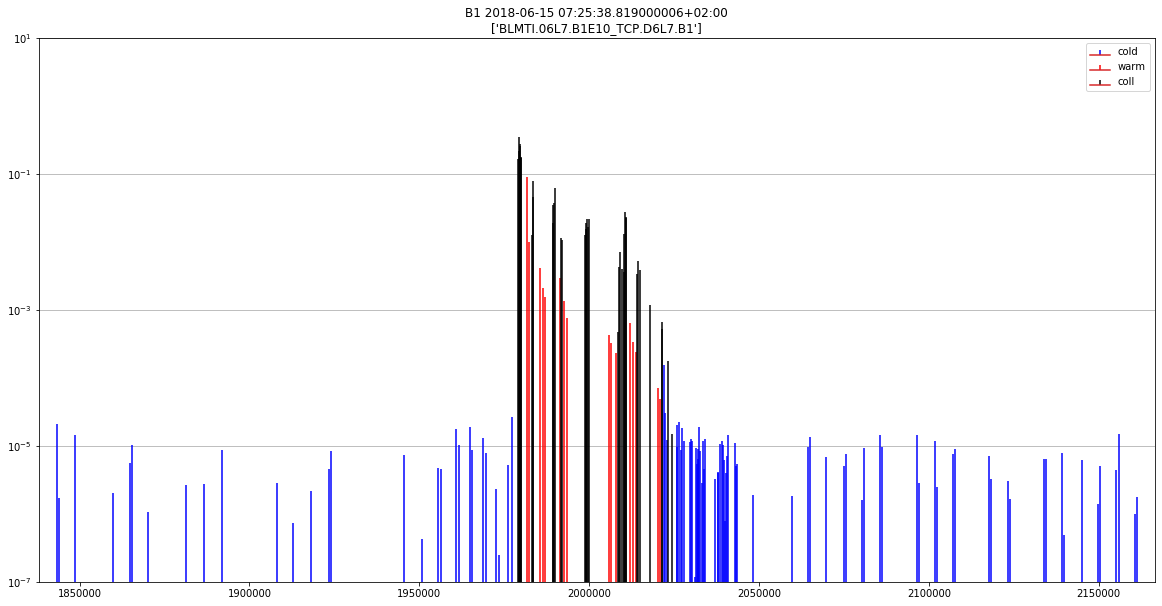

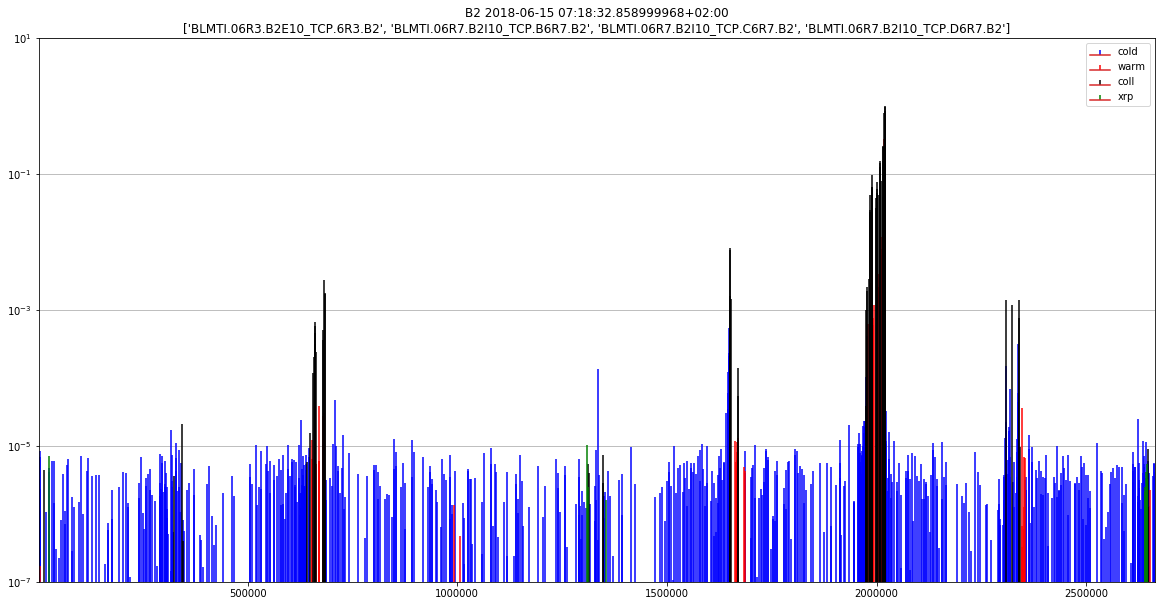

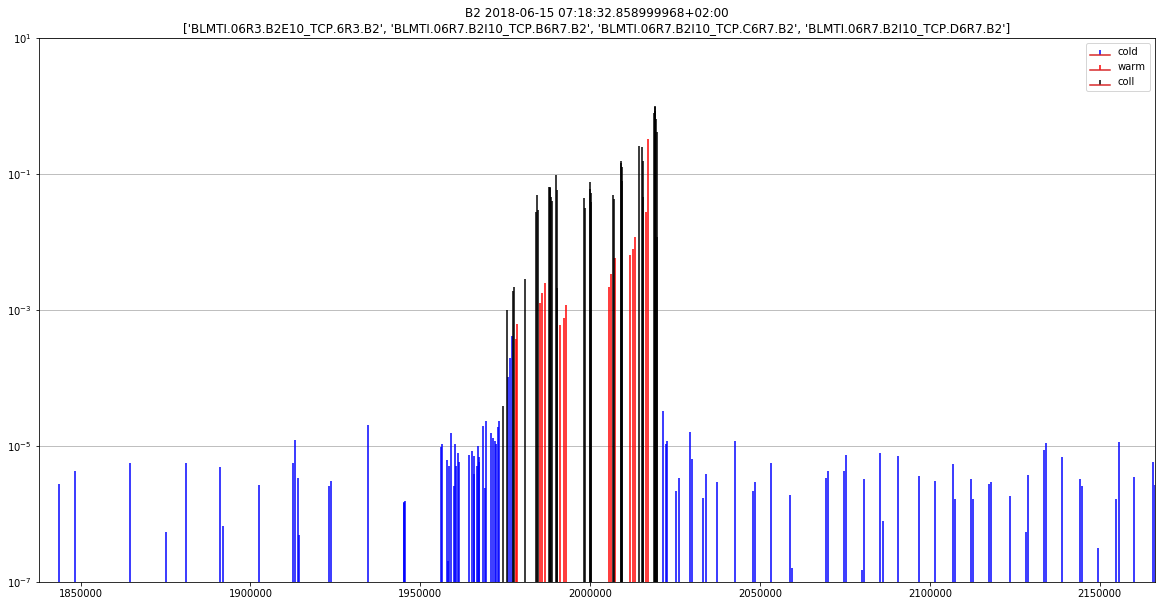

In [7]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['INJPHYS'])
OP_LM_plot(fills, 'INJPHYS')

# RAMP

Beam mode RAMP
06-15 02:34:34 ▶06-15 02:54:55
Beam mode INJPROT
06-15 01:50:07 ▶06-15 01:54:49


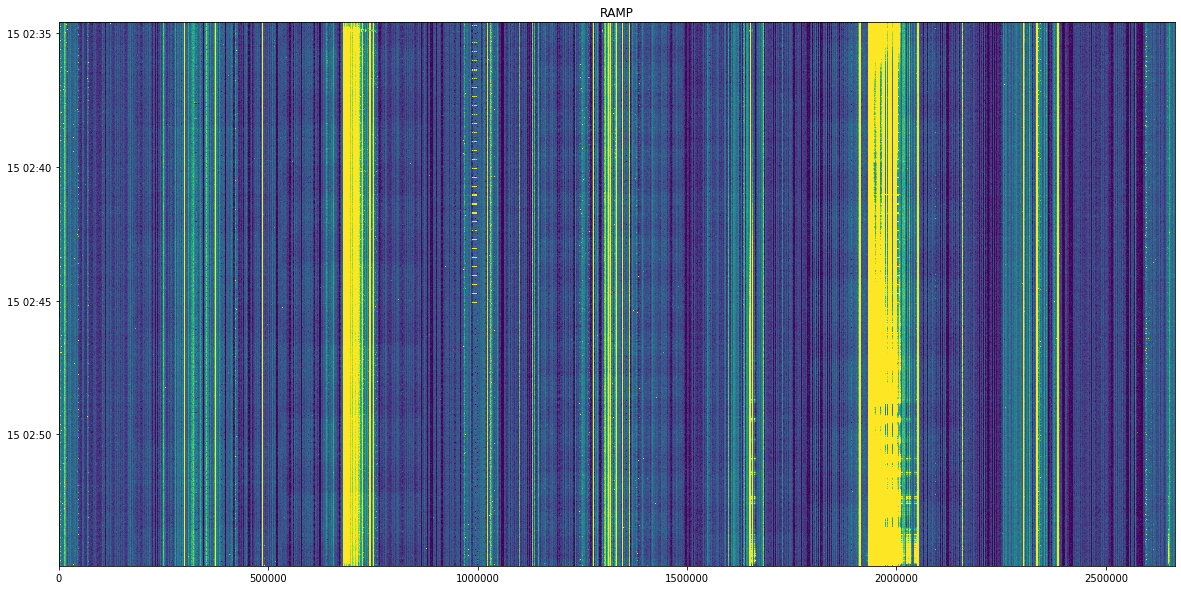

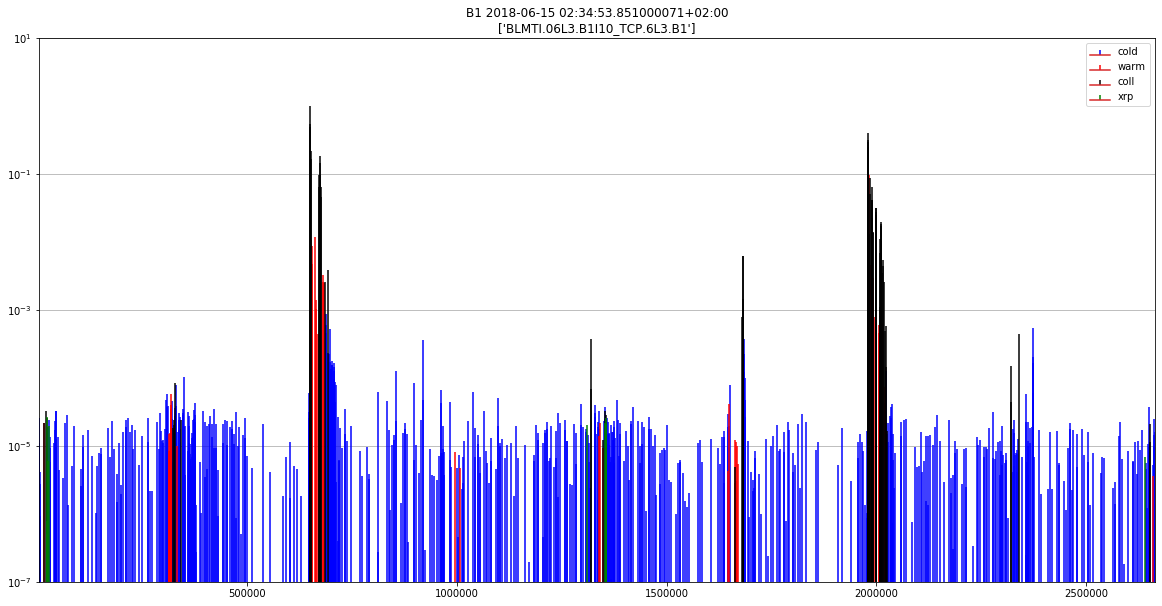

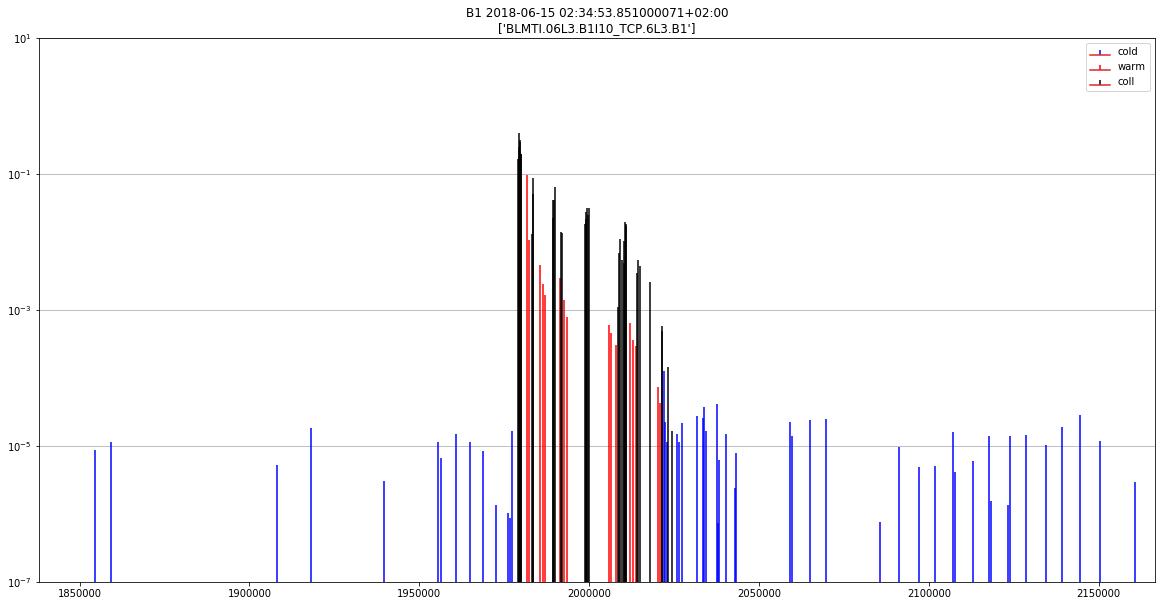

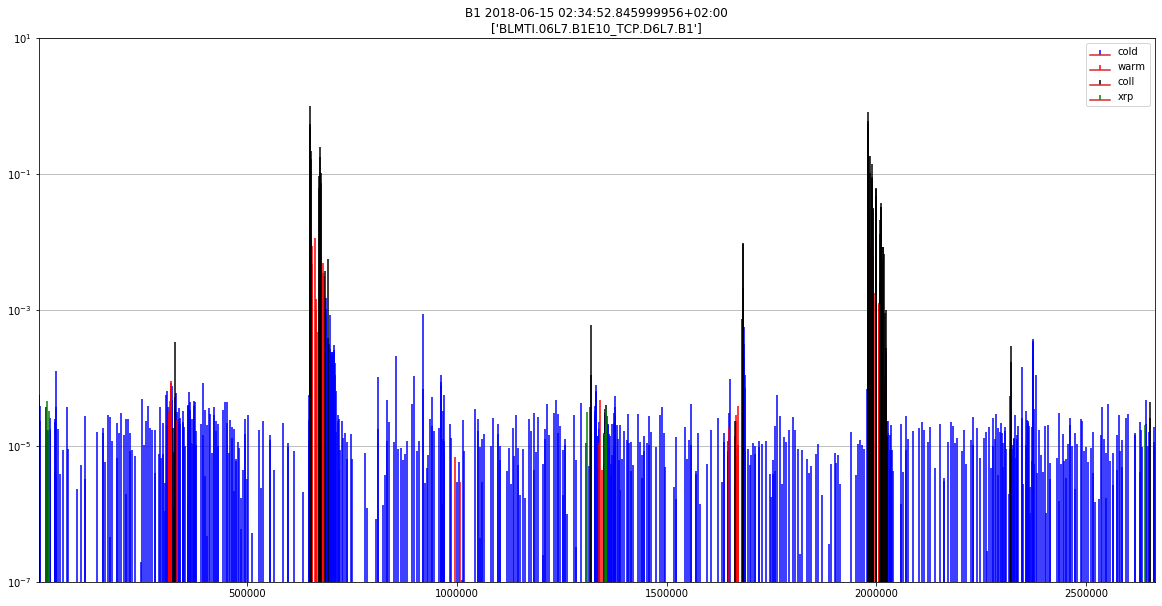

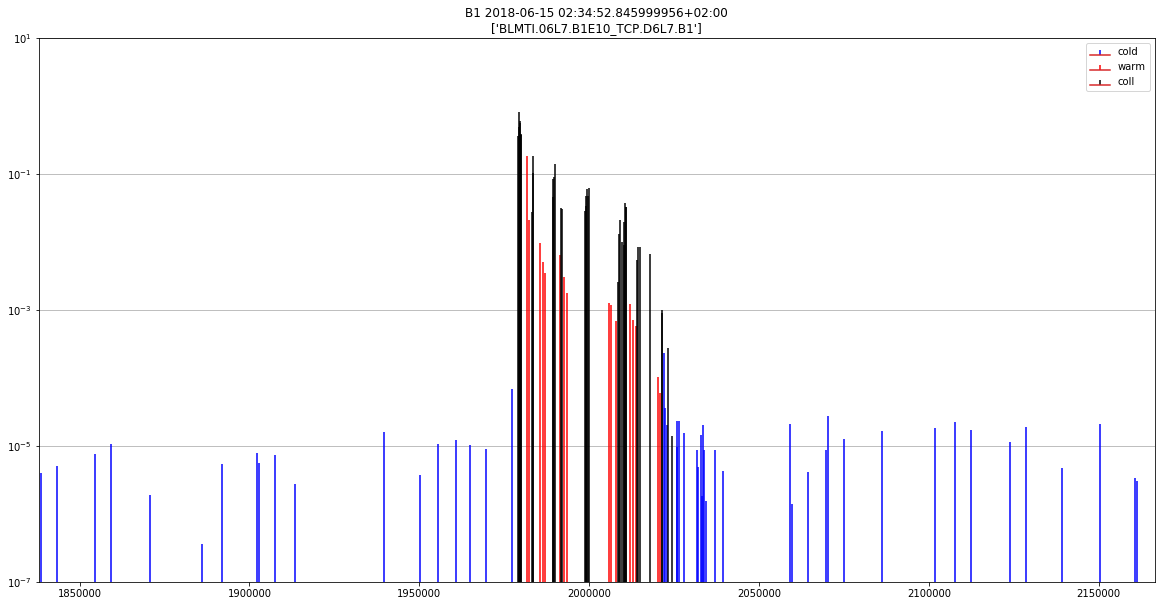

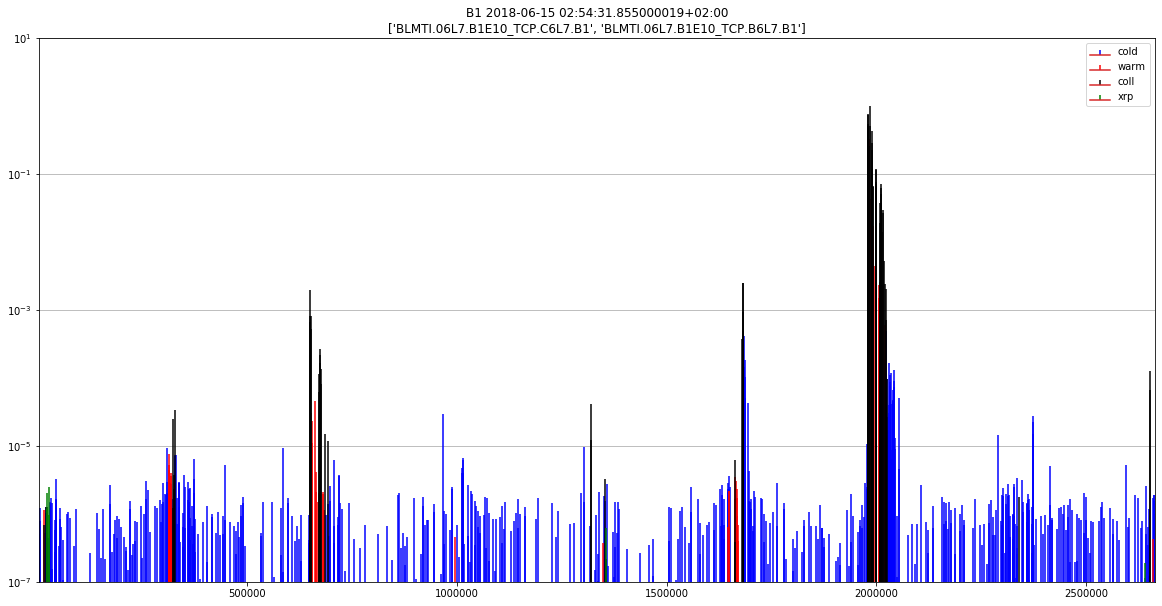

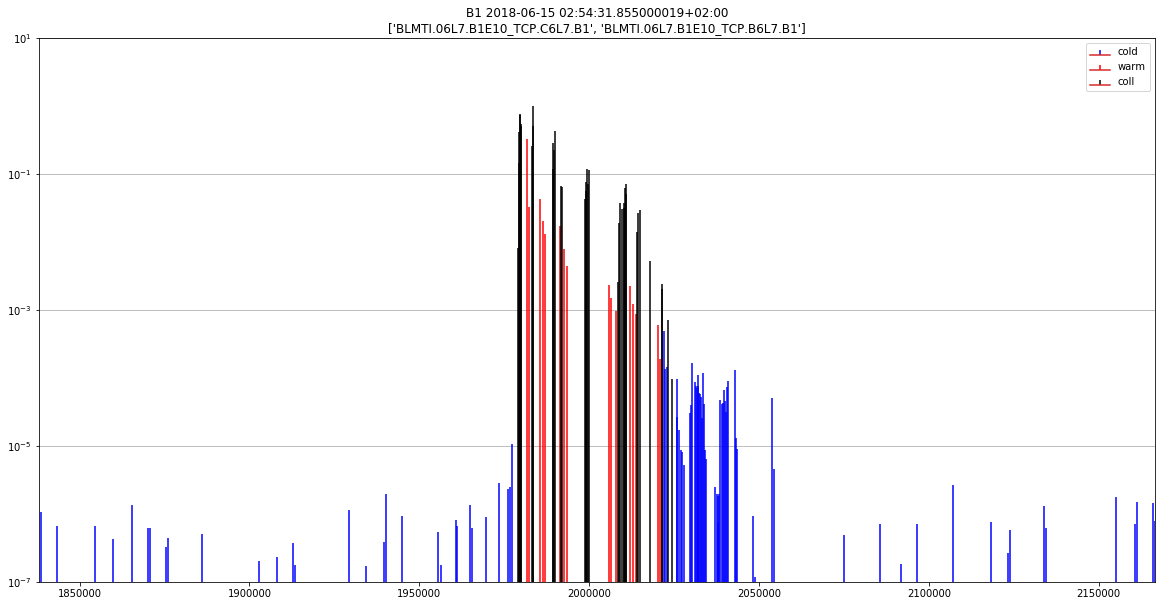

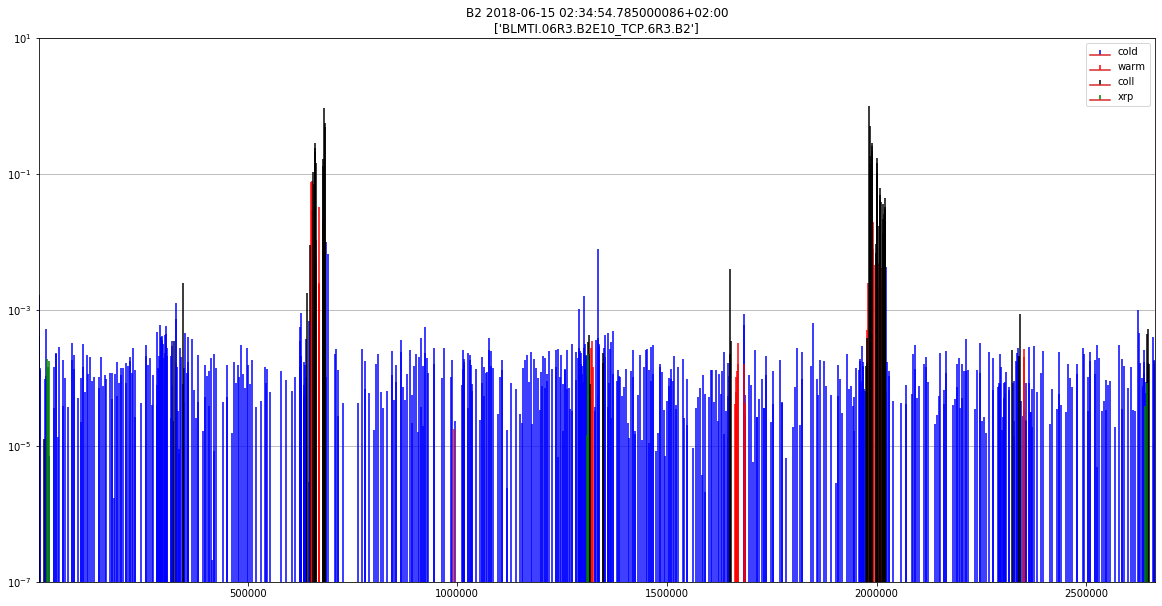

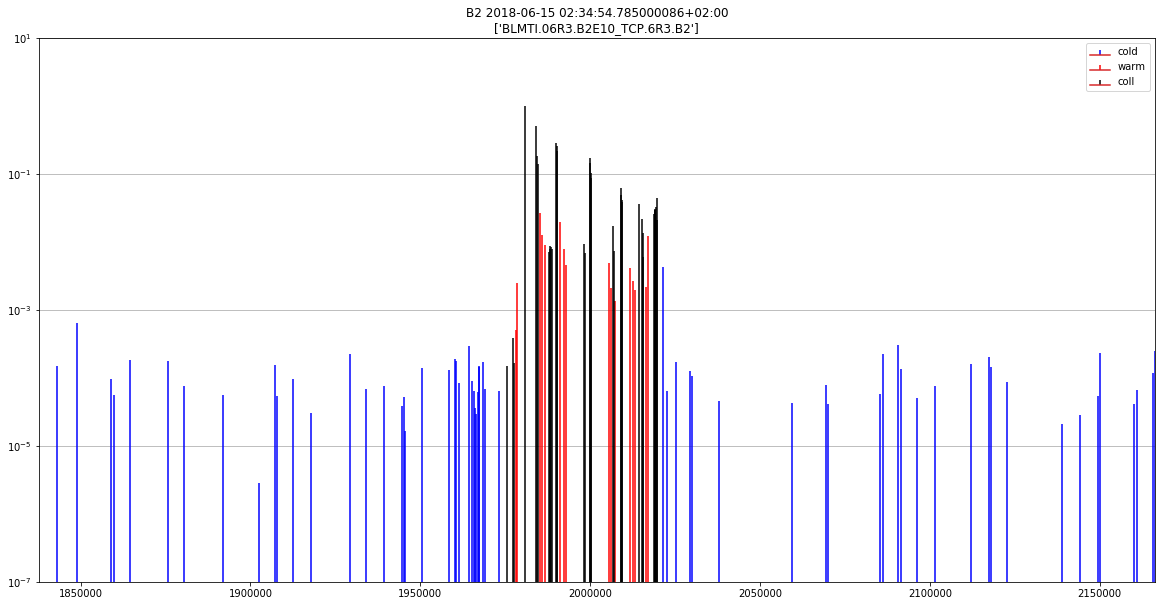

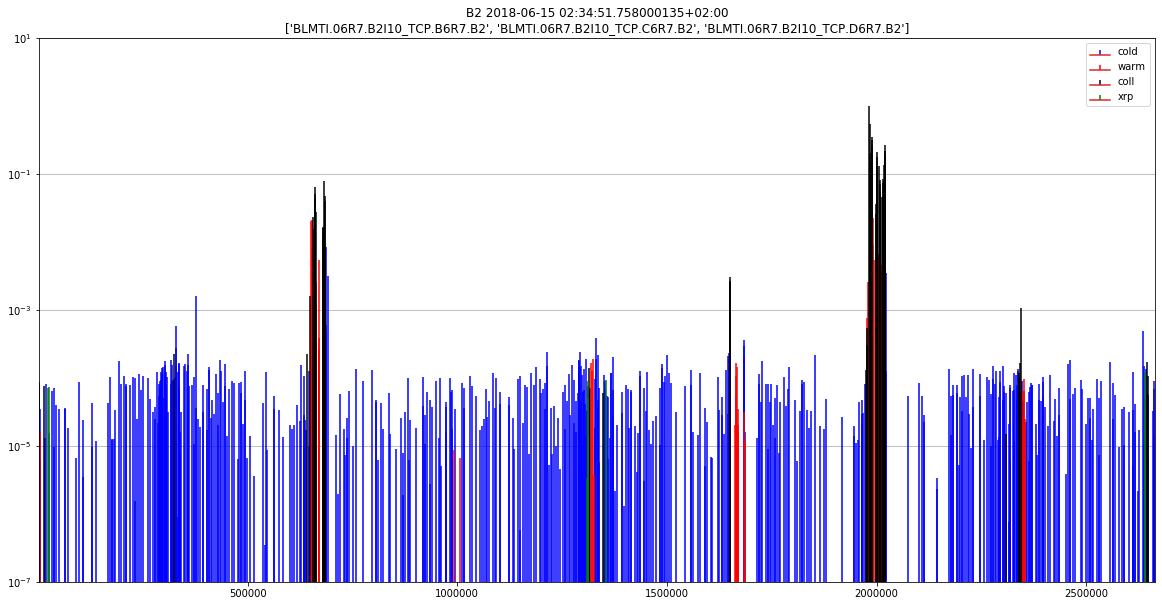

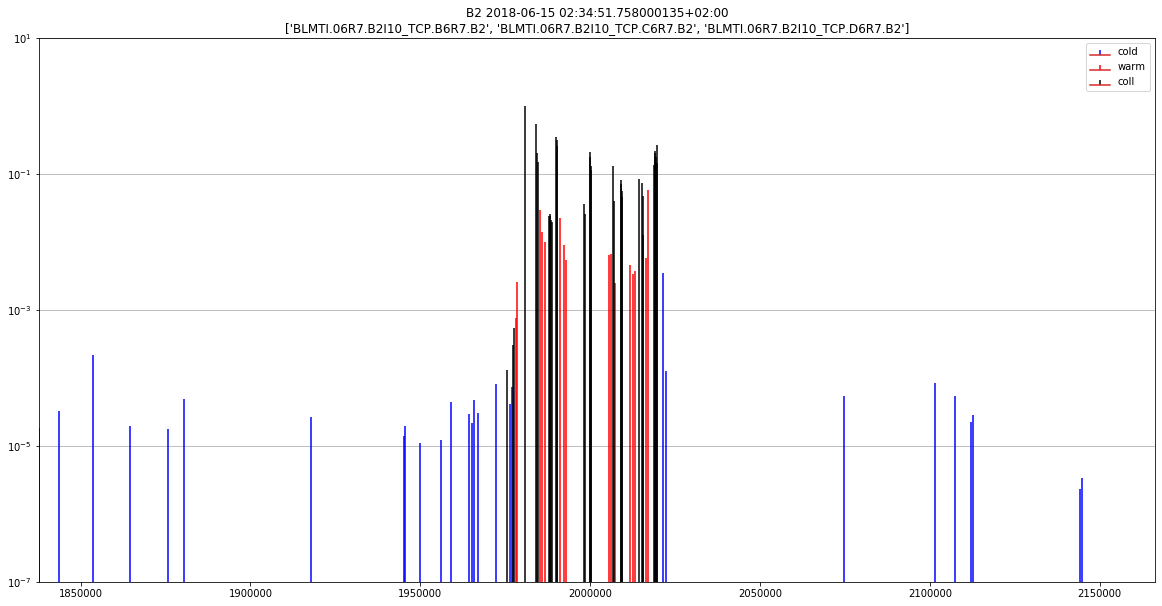

Beam mode RAMP
06-15 07:37:53 ▶06-15 07:58:17
Beam mode INJPROT
06-15 06:54:06 ▶06-15 07:05:02


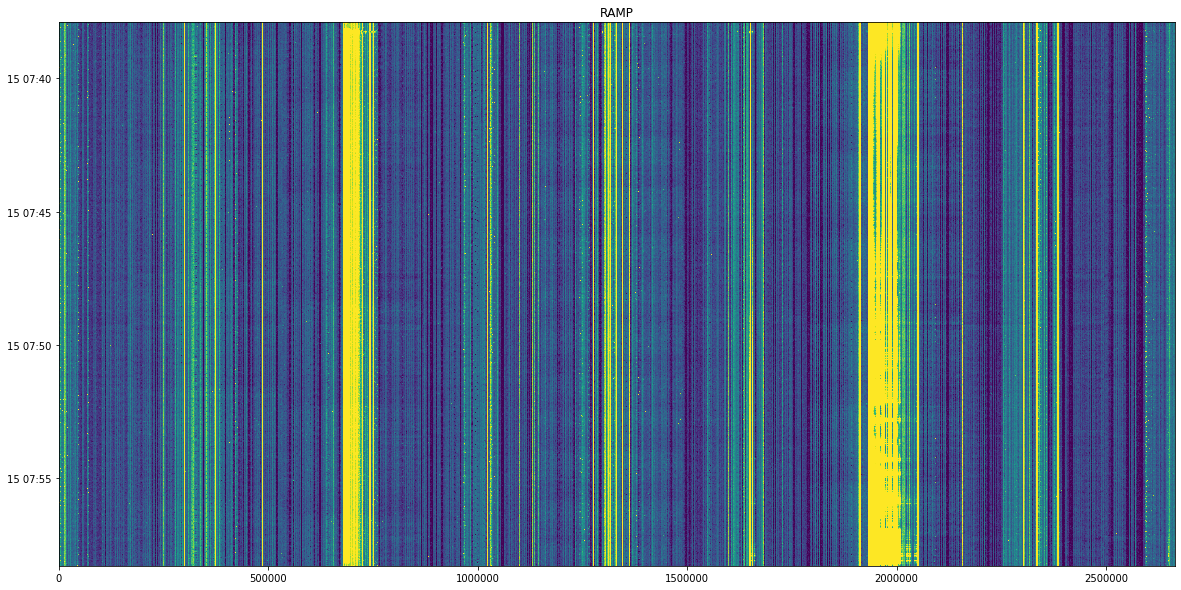

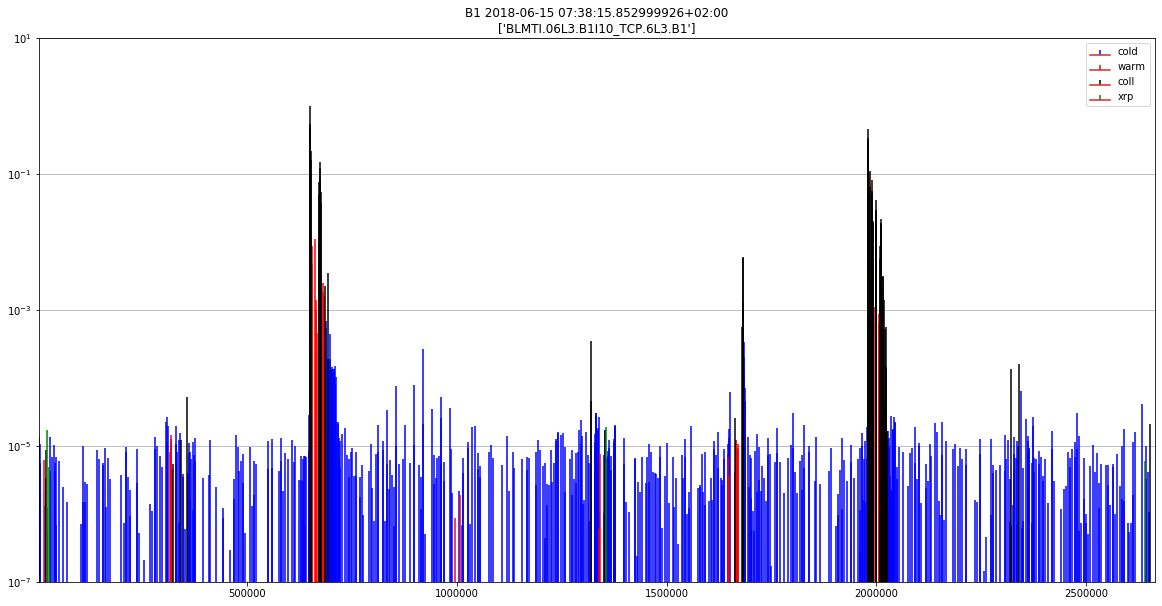

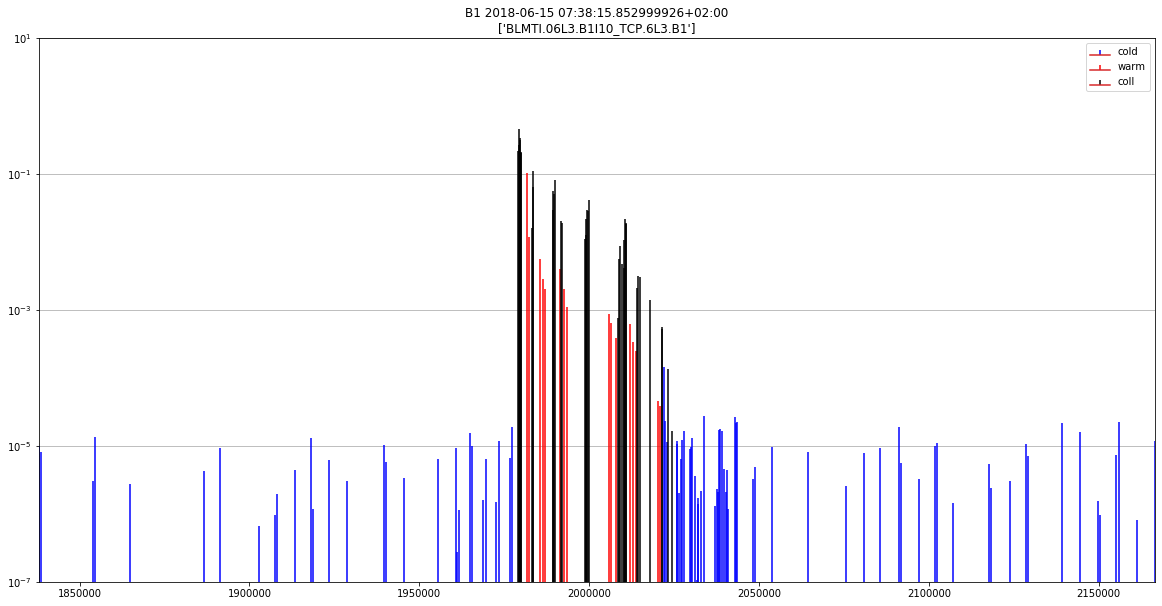

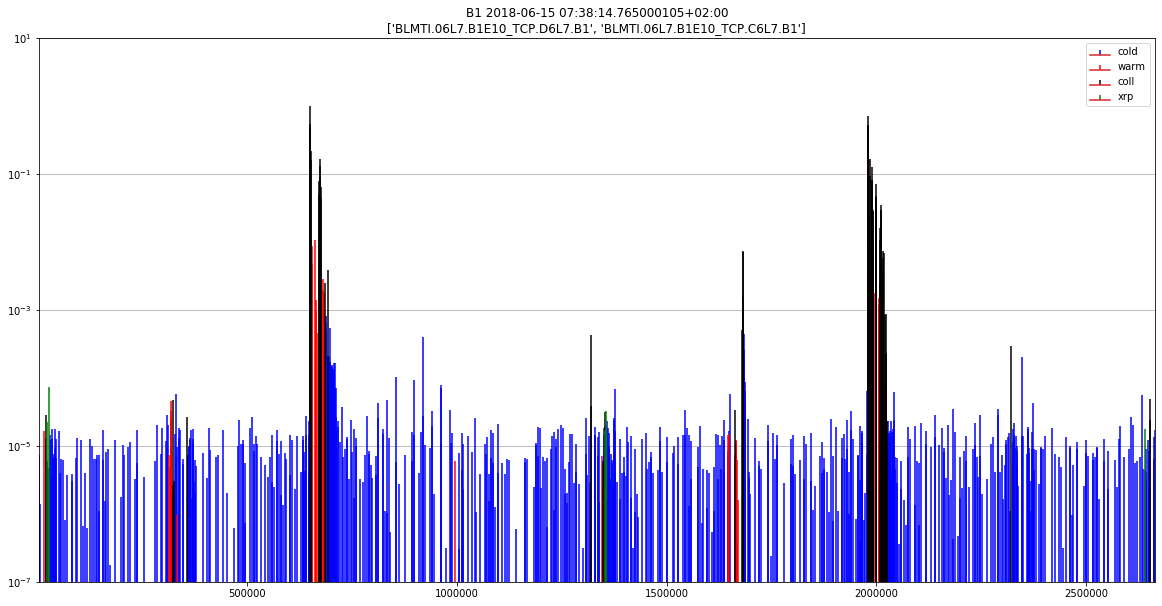

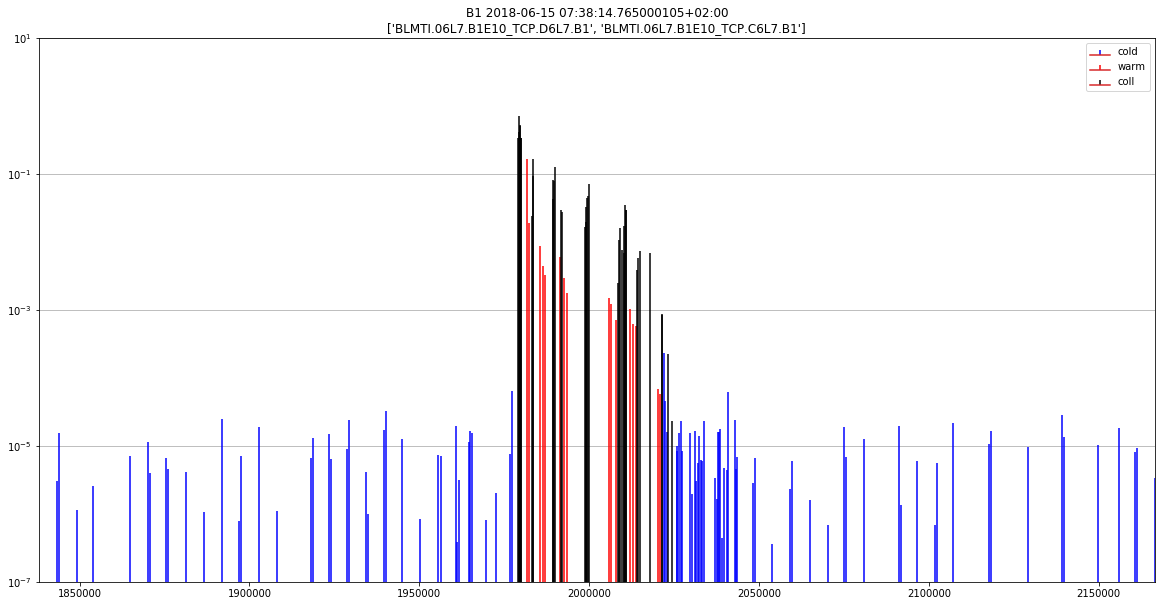

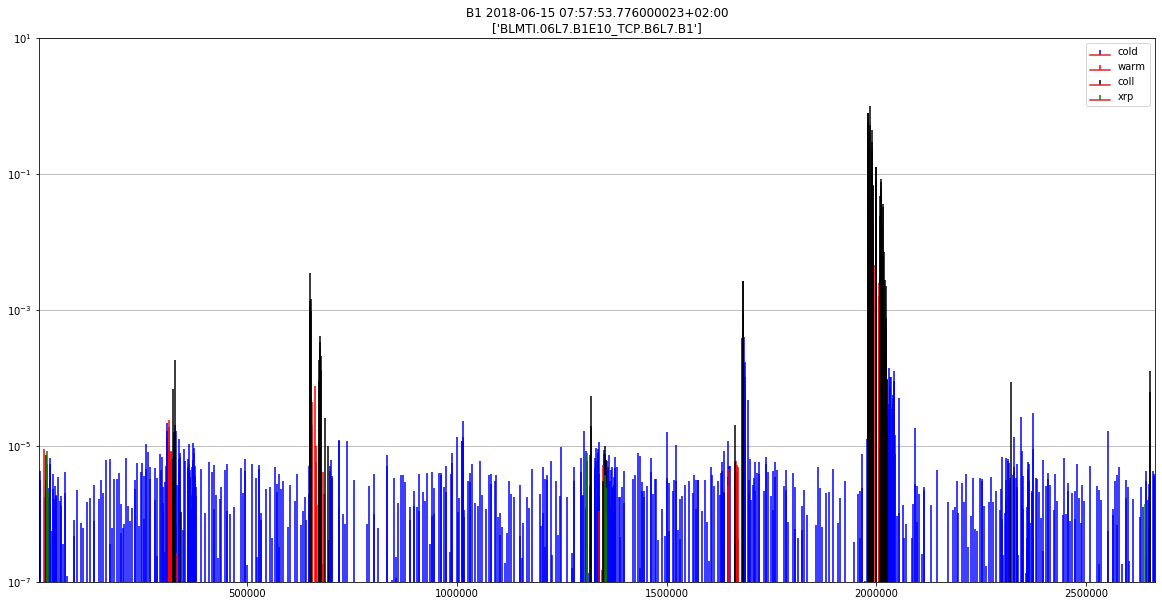

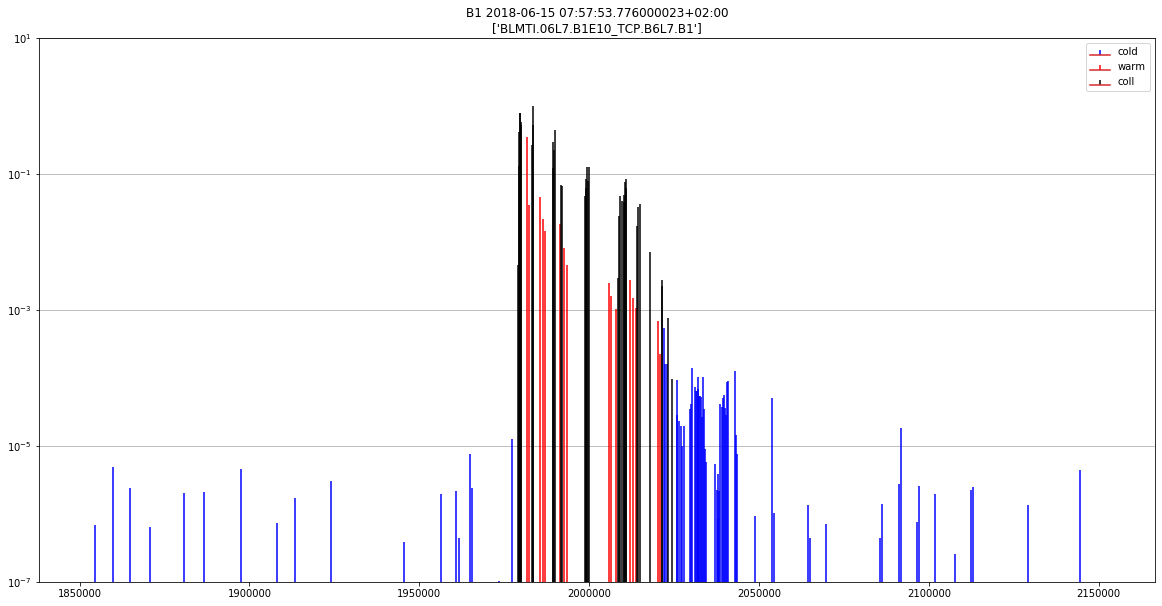

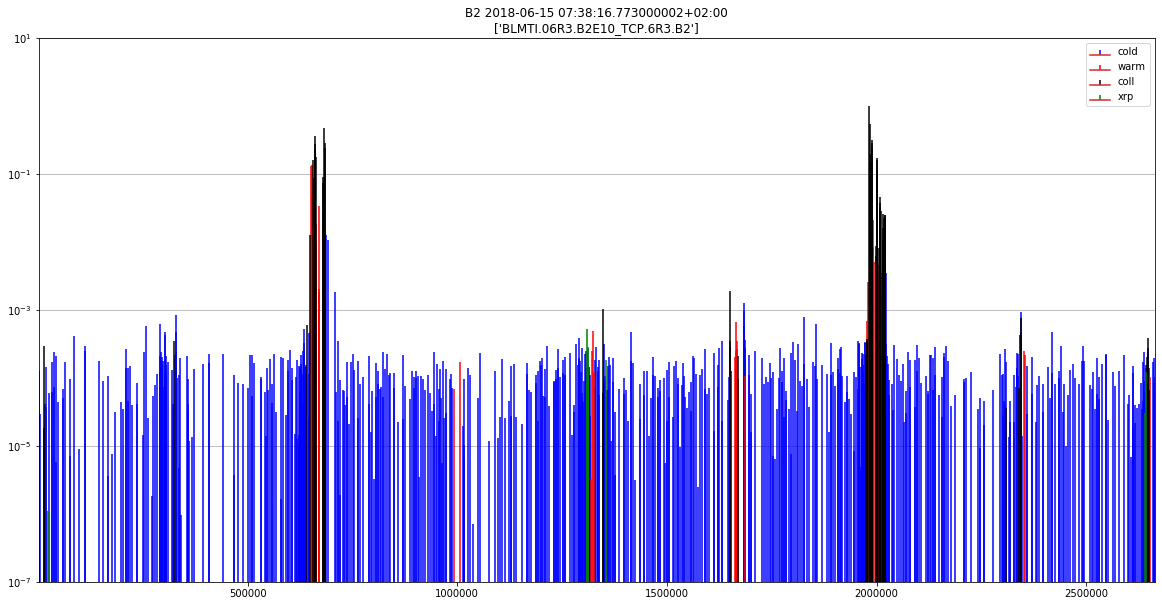

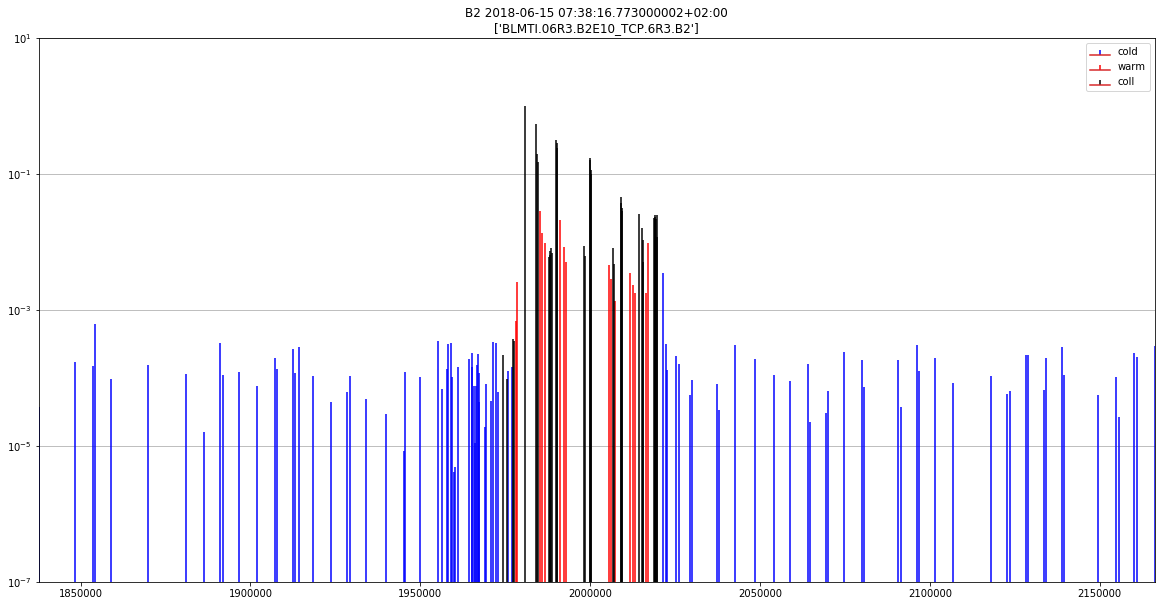

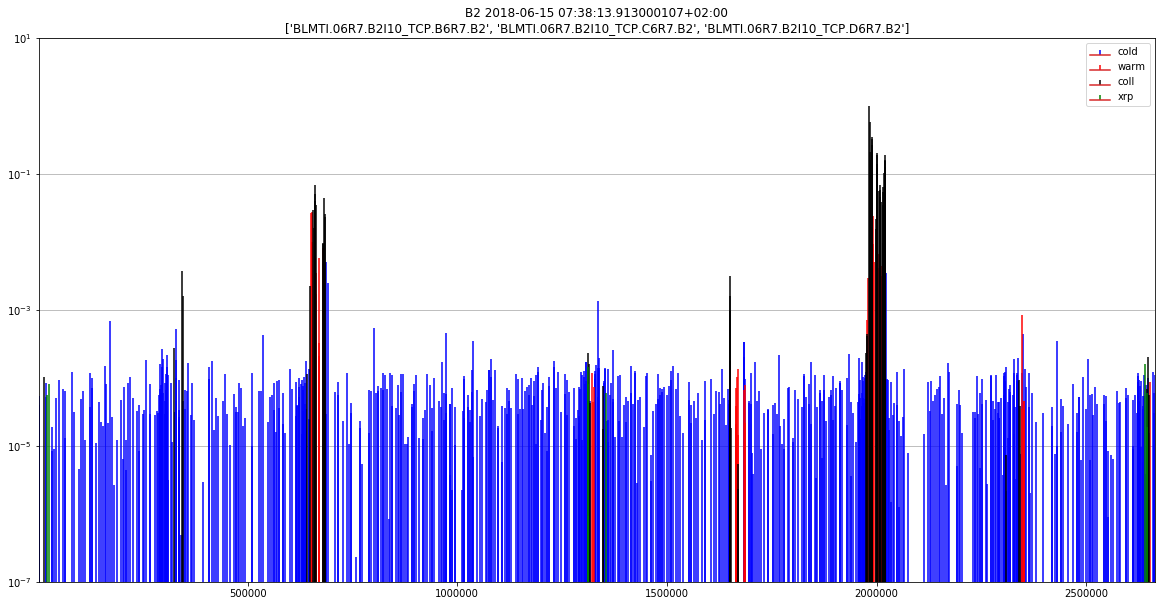

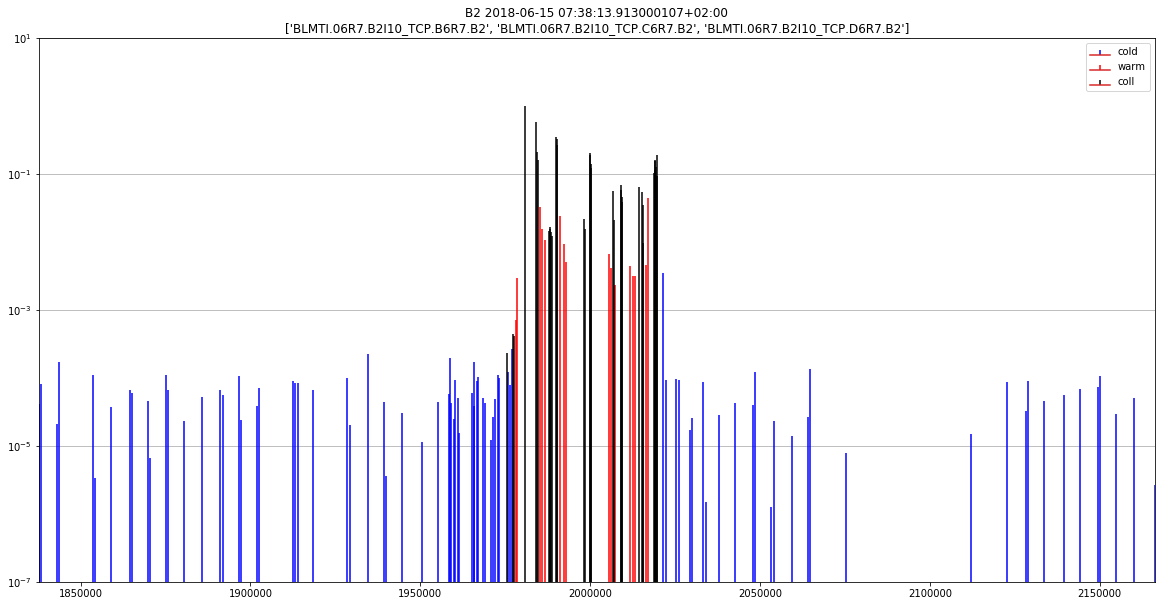

Beam mode RAMP
06-15 12:34:53 ▶06-15 12:55:49
Beam mode INJPROT
06-15 11:21:23 ▶06-15 11:49:29


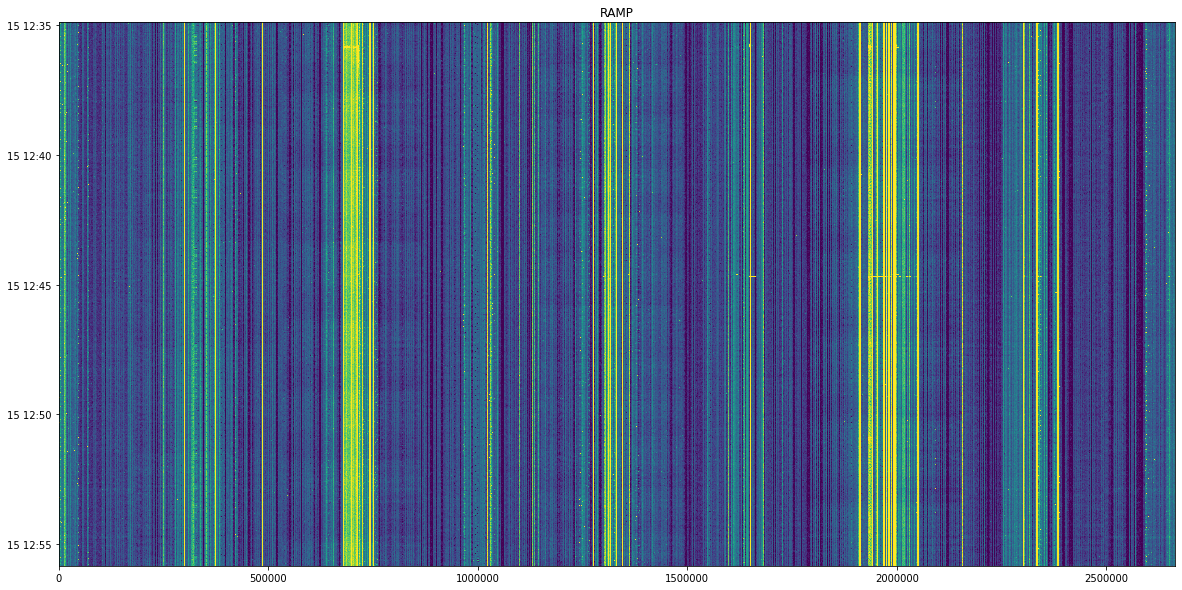

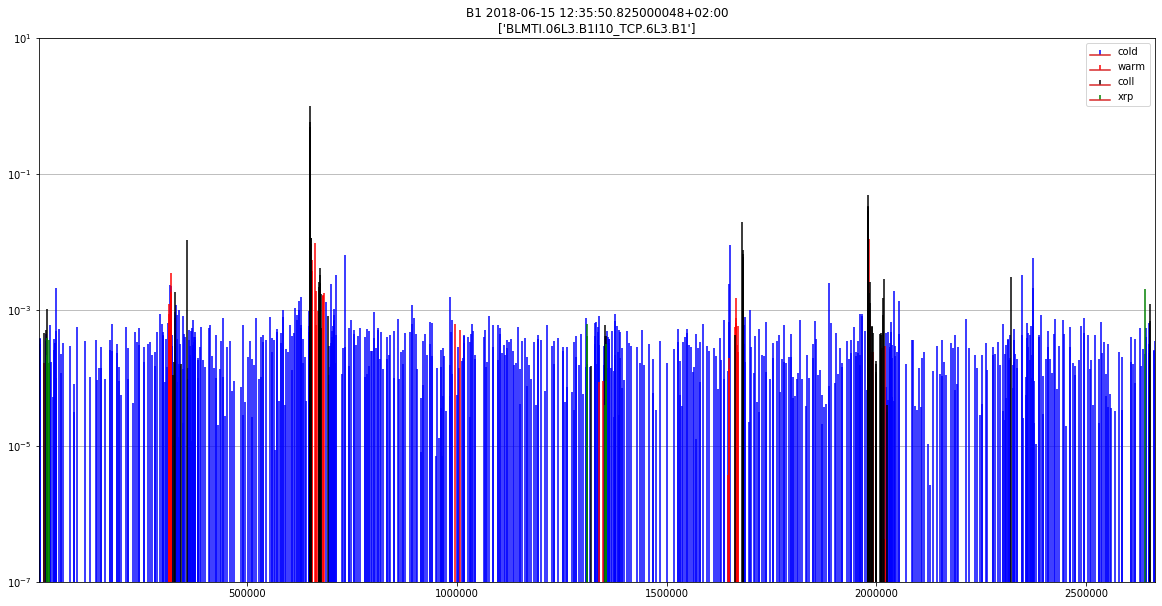

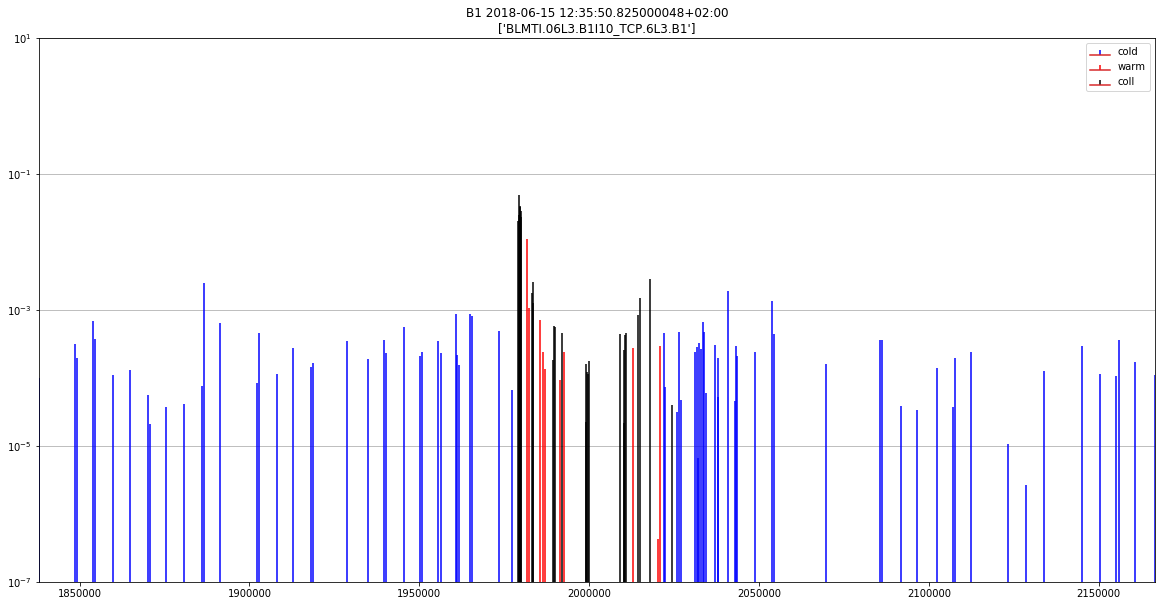

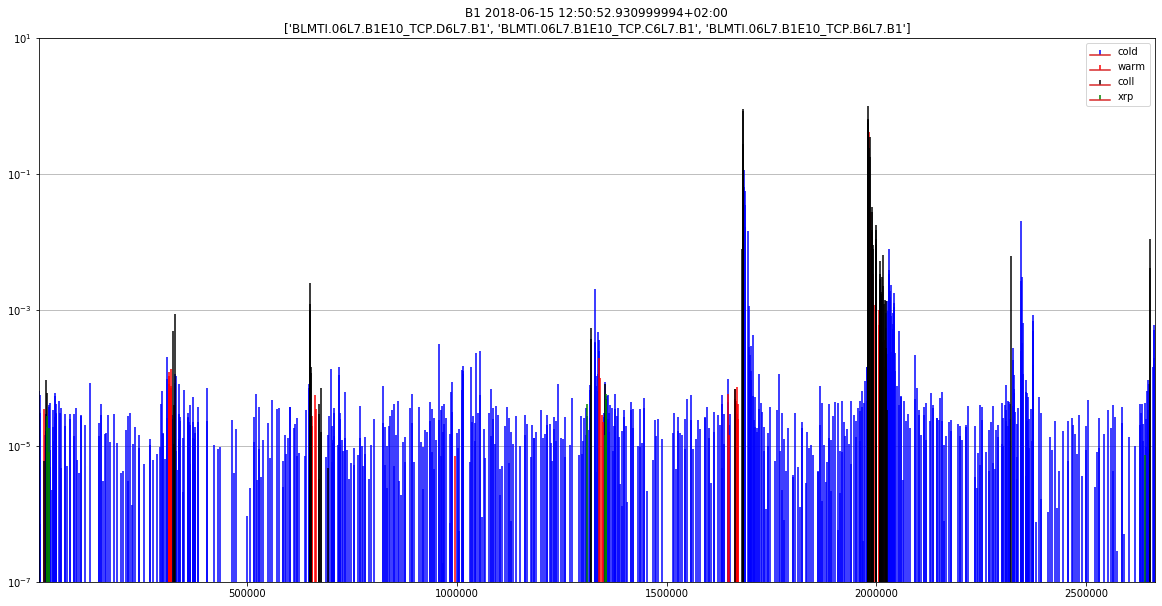

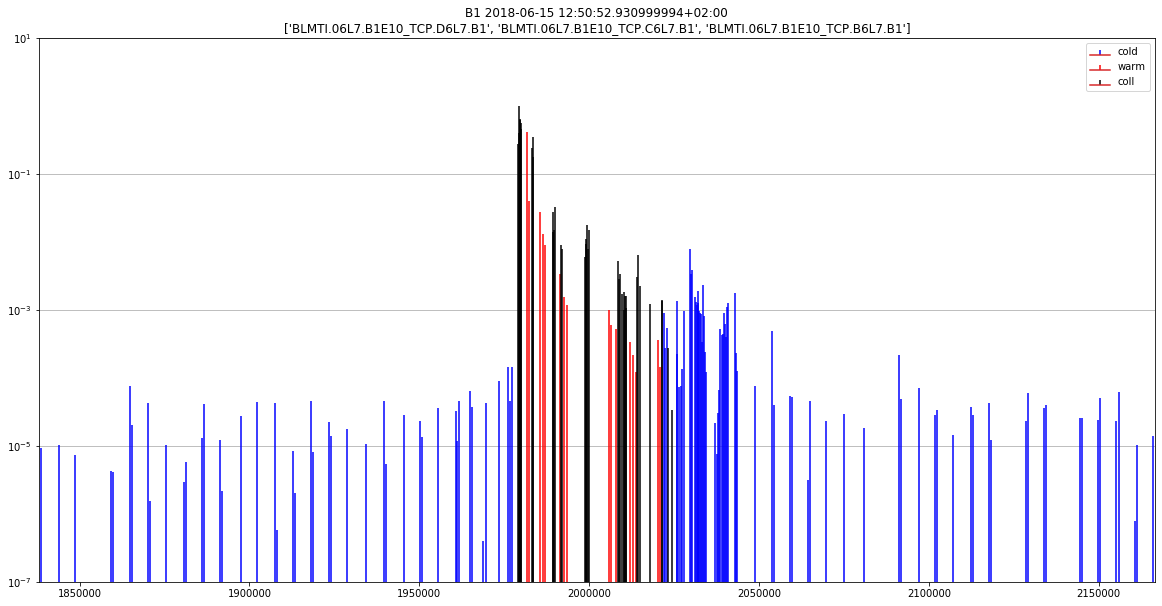

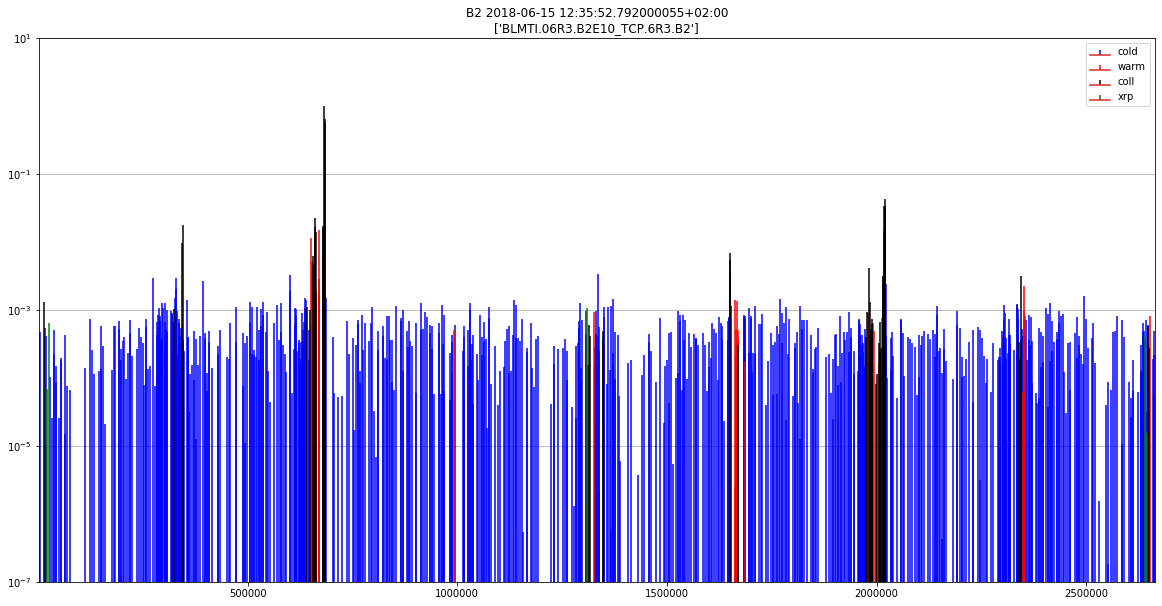

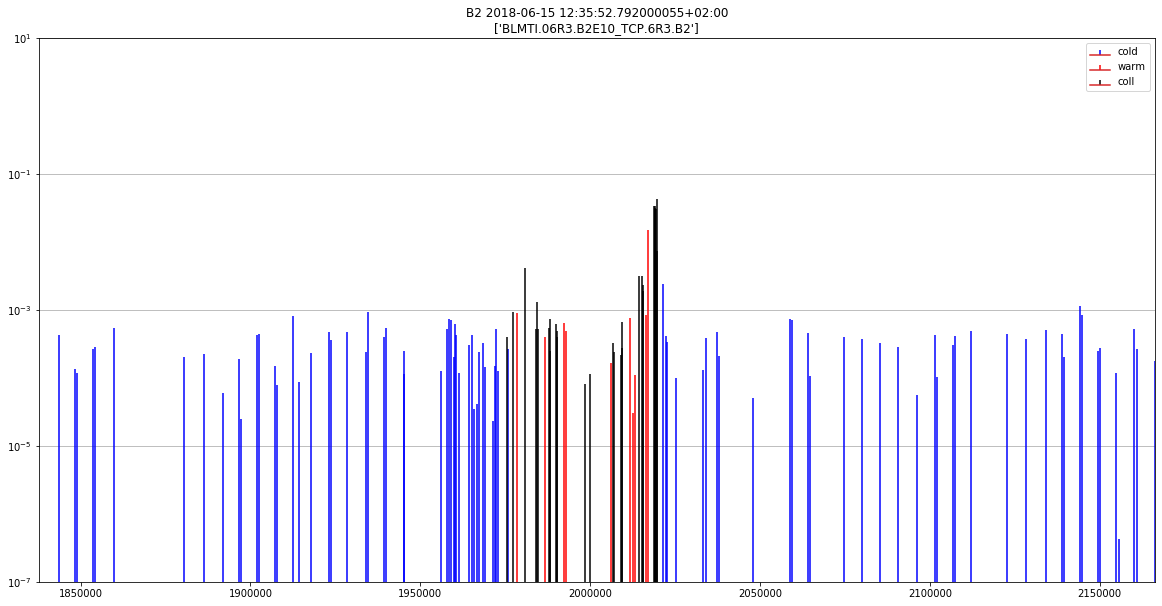

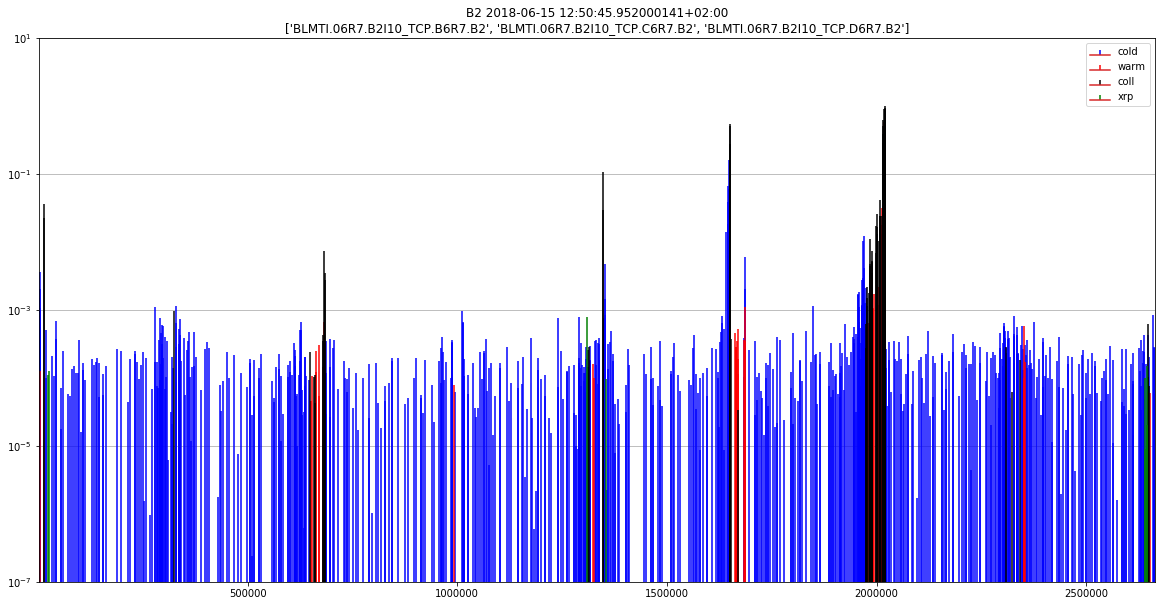

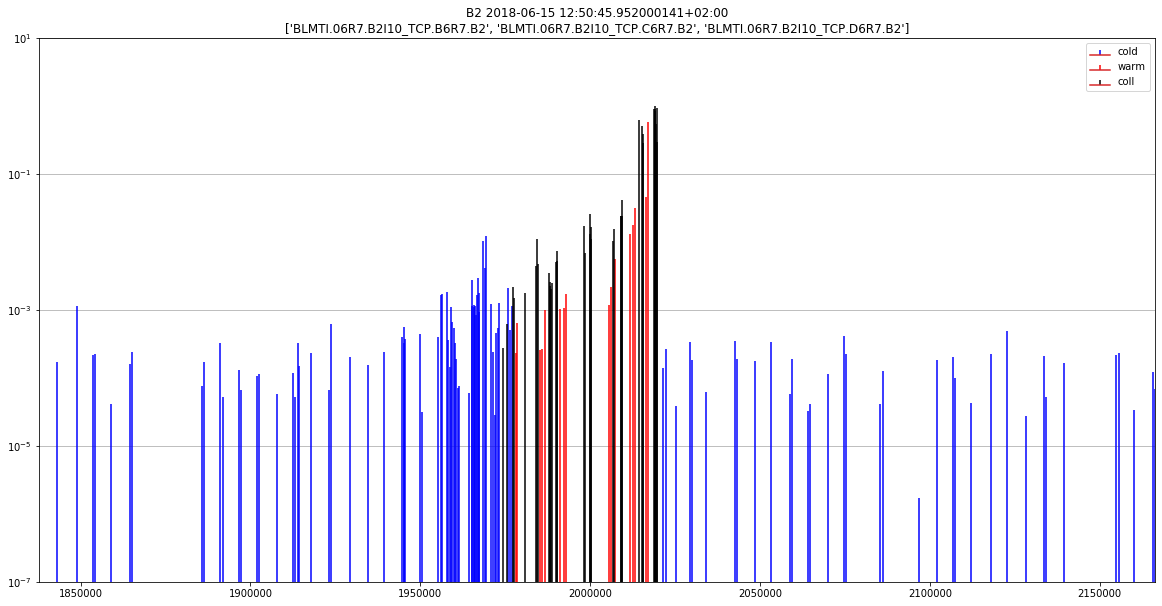

In [8]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['RAMP'])
OP_LM_plot(fills, 'RAMP')